# Imports


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder


# Clean dataset (Step 1)
1. Load raw datasets
2. Rename columns
3. Discard unnecessary columns
4. Save cleaned dataset

## Read column info

In [ ]:
brfss_features = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets/BRFSS - Features (Structured).csv')
brfss_features

,BRFSS 2021,BRFSS 2019,BRFSS 2017,BRFSS 2015,Column name
0,BPHIGH6,BPHIGH4,BPHIGH4,BPHIGH4,Blood pressure
1,TOLDHI3,TOLDHI2,TOLDHI2,TOLDHI2,Cholesterol
2,_BMI5CAT,_BMI5CAT,_BMI5CAT,_BMI5CAT,BMI category
3,CVDSTRK3,CVDSTRK3,CVDSTRK3,CVDSTRK3,Stroke
4,_MICHD,_MICHD,_MICHD,_MICHD,Heart disease
5,_FRTLT1A,_FRTLT1A,_FRTLT1A,_FRTLT1,Consume fruits
6,_VEGLT1A,_VEGLT1A,_VEGLT1A,_VEGLT1,Consume vegitables
7,DRNKANY5,DRNKANY5,DRNKANY5,DRNKANY5,Alcoholic
8,_HLTHPLN,HLTHPLN1,HLTHPLN1,HLTHPLN1,Health insurance
9,MEDCOST1,MEDCOST,MEDCOST,MEDCOST,Visit doctor


## BRFSS 2021

In [ ]:
brfss_2021 = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets/BRFSS 2021.csv')
brfss_2021

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.frtres1,x.vegres1,x.frutsu1,x.vegesu1,x.frtlt1a,x.veglt1a,x.frt16a,x.veg23a,x.fruite1,x.vegete1
0,1,1,1,1192021,1,19,2021,1100,2021000001,2021000001,...,1,1,100.0,214.0,1,1,1,1,0,0
1,2,1,1,1212021,1,21,2021,1100,2021000002,2021000002,...,1,1,100.0,128.0,1,1,1,1,0,0
2,3,1,1,1212021,1,21,2021,1100,2021000003,2021000003,...,1,1,100.0,71.0,1,2,1,1,0,0
3,4,1,1,1172021,1,17,2021,1100,2021000004,2021000004,...,1,1,114.0,165.0,1,1,1,1,0,0
4,5,1,1,1152021,1,15,2021,1100,2021000005,2021000005,...,1,1,100.0,258.0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,438689,78,12,1062022,1,6,2022,1100,2021001381,2021001381,...,1,1,157.0,393.0,1,1,1,1,0,0
438689,438690,78,12,1122022,1,12,2022,1100,2021001382,2021001382,...,1,1,200.0,157.0,1,1,1,1,0,0
438690,438691,78,12,12212021,12,21,2021,1100,2021001383,2021001383,...,1,1,200.0,143.0,1,1,1,1,0,0
438691,438692,78,12,1112022,1,11,2022,1100,2021001384,2021001384,...,1,1,100.0,156.0,1,1,1,1,0,0


In [ ]:
new_columns = []
for i in brfss_2021.columns:
  if i[0] == 'x':
    temp = '_' + i[2:].upper()
    new_columns.append(temp)
  else:
    temp = i.upper()
    new_columns.append(temp)


brfss_2021.columns = new_columns
brfss_2021

,UNNAMED: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1,1,1,1192021,1,19,2021,1100,2021000001,2021000001,...,1,1,100.0,214.0,1,1,1,1,0,0
1,2,1,1,1212021,1,21,2021,1100,2021000002,2021000002,...,1,1,100.0,128.0,1,1,1,1,0,0
2,3,1,1,1212021,1,21,2021,1100,2021000003,2021000003,...,1,1,100.0,71.0,1,2,1,1,0,0
3,4,1,1,1172021,1,17,2021,1100,2021000004,2021000004,...,1,1,114.0,165.0,1,1,1,1,0,0
4,5,1,1,1152021,1,15,2021,1100,2021000005,2021000005,...,1,1,100.0,258.0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,438689,78,12,1062022,1,6,2022,1100,2021001381,2021001381,...,1,1,157.0,393.0,1,1,1,1,0,0
438689,438690,78,12,1122022,1,12,2022,1100,2021001382,2021001382,...,1,1,200.0,157.0,1,1,1,1,0,0
438690,438691,78,12,12212021,12,21,2021,1100,2021001383,2021001383,...,1,1,200.0,143.0,1,1,1,1,0,0
438691,438692,78,12,1112022,1,11,2022,1100,2021001384,2021001384,...,1,1,100.0,156.0,1,1,1,1,0,0


In [ ]:
# select specific columns
brfss_2021_selected = brfss_2021[brfss_features['BRFSS 2021'].to_list()]
brfss_2021_selected.shape

(438693, 31)

In [ ]:
brfss_2021_selected.columns = brfss_features['Column name'].to_list()
brfss_2021_selected

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,3.0,1.0,1.0,2.0,2.0,1,1,2,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
1,1.0,1.0,NaN,2.0,1.0,1,1,2,1,2.0,...,8.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,3.0,2.0,1.0,1,2,2,1,2.0,...,7.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
3,1.0,1.0,4.0,2.0,2.0,1,1,1,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
4,4.0,1.0,3.0,1.0,1.0,1,1,2,1,2.0,...,8.0,1.0,7.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,1.0,2.0,2.0,2.0,2.0,1,1,1,2,1.0,...,1.0,5.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
438689,1.0,2.0,NaN,2.0,2.0,1,1,2,9,2.0,...,8.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0
438690,3.0,1.0,4.0,2.0,2.0,1,1,1,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
438691,1.0,2.0,2.0,2.0,2.0,1,1,1,1,2.0,...,7.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0


In [ ]:
df = brfss_2021_selected

# Count NaN or null values in each column
nan_count = df.isnull().sum()
total_count = len(df)

# Calculate percentage
nan_percentage = (nan_count / total_count) * 100

# Create a new DataFrame
result_df = pd.DataFrame({'NaN Count': nan_count, 'NaN Percentage': nan_percentage})

# Sort by NaN Percentage
result_df = result_df.sort_values(by='NaN Percentage', ascending=False)

print(result_df)

                          NaN Count  NaN Percentage
Cholesterol                   60836       13.867557
BMI category                  46852       10.679906
Flu shot                      27648        6.302357
Difficulty walking            18009        4.105149
Difficulty concentrating      16843        3.839359
Diffculty seeing              15744        3.588842
Income                         8847        2.016672
Heart disease                  4635        1.056548
Employment status              3588        0.817884
Own home                          8        0.001824
Marital status                    5        0.001140
Visit doctor                      5        0.001140
Education                         5        0.001140
General health                    4        0.000912
Physical health                   3        0.000684
Kidney disease                    3        0.000684
Depressive disorder               3        0.000684
Diabetes                          3        0.000684
Heart Diseas

In [ ]:
brfss_2021_selected = brfss_2021_selected.dropna()
brfss_2021_selected.shape

(325678, 31)

In [ ]:
brfss_2021_selected.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/BRFSS 2021.csv', index = False)

In [ ]:
brfss_2021_selected_loaded = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/BRFSS 2021.csv')
brfss_2021_selected_loaded

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,3.0,1.0,1.0,2.0,2.0,1,1,2,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
1,1.0,2.0,3.0,2.0,1.0,1,2,2,1,2.0,...,7.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
2,1.0,1.0,4.0,2.0,2.0,1,1,1,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,4.0,1.0,3.0,1.0,1.0,1,1,2,1,2.0,...,8.0,1.0,7.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
4,3.0,2.0,2.0,2.0,2.0,2,2,2,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325673,1.0,1.0,2.0,2.0,2.0,1,1,1,1,2.0,...,7.0,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0
325674,1.0,2.0,2.0,2.0,2.0,1,1,1,2,1.0,...,1.0,5.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
325675,3.0,1.0,4.0,2.0,2.0,1,1,1,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
325676,1.0,2.0,2.0,2.0,2.0,1,1,1,1,2.0,...,7.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0


## BRFSS 2019

In [ ]:
brfss_2019 = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets/BRFSS 2019.csv')
brfss_2019

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.vegesu1,x.frtlt1a,x.veglt1a,x.frt16a,x.veg23a,x.fruite1,x.vegete1,x.flshot7,x.pneumo3,x.aidtst4
0,1,1,1,1182019,1,18,2019,1100,2019000001,2019000001,...,114.0,1,1,1,1,0,0,2.0,1.0,2.0
1,2,1,1,1132019,1,13,2019,1100,2019000002,2019000002,...,121.0,1,1,1,1,0,0,1.0,1.0,2.0
2,3,1,1,1182019,1,18,2019,1100,2019000003,2019000003,...,164.0,1,1,1,1,0,0,1.0,2.0,2.0
3,4,1,1,1182019,1,18,2019,1200,2019000004,2019000004,...,NaN,9,9,1,1,1,1,9.0,9.0,NaN
4,5,1,1,1042019,1,4,2019,1100,2019000005,2019000005,...,178.0,1,1,1,1,0,0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418263,418264,72,9,3152020,3,15,2020,1100,2019006029,2019006029,...,43.0,1,2,1,1,0,0,2.0,2.0,2.0
418264,418265,72,9,3082020,3,8,2020,1100,2019006030,2019006030,...,142.0,1,1,1,1,0,0,NaN,NaN,2.0
418265,418266,72,9,3102020,3,10,2020,1100,2019006031,2019006031,...,55.0,1,2,1,1,0,0,NaN,NaN,1.0
418266,418267,72,9,3062020,3,6,2020,1100,2019006032,2019006032,...,214.0,1,1,1,1,0,0,2.0,2.0,2.0


In [ ]:
new_columns = []
for i in brfss_2019.columns:
  if i[0] == 'x':
    temp = '_' + i[2:].upper()
    new_columns.append(temp)
  else:
    temp = i.upper()
    new_columns.append(temp)

brfss_2019.columns = new_columns
brfss_2019

,UNNAMED: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1,1,1,1182019,1,18,2019,1100,2019000001,2019000001,...,114.0,1,1,1,1,0,0,2.0,1.0,2.0
1,2,1,1,1132019,1,13,2019,1100,2019000002,2019000002,...,121.0,1,1,1,1,0,0,1.0,1.0,2.0
2,3,1,1,1182019,1,18,2019,1100,2019000003,2019000003,...,164.0,1,1,1,1,0,0,1.0,2.0,2.0
3,4,1,1,1182019,1,18,2019,1200,2019000004,2019000004,...,NaN,9,9,1,1,1,1,9.0,9.0,NaN
4,5,1,1,1042019,1,4,2019,1100,2019000005,2019000005,...,178.0,1,1,1,1,0,0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418263,418264,72,9,3152020,3,15,2020,1100,2019006029,2019006029,...,43.0,1,2,1,1,0,0,2.0,2.0,2.0
418264,418265,72,9,3082020,3,8,2020,1100,2019006030,2019006030,...,142.0,1,1,1,1,0,0,NaN,NaN,2.0
418265,418266,72,9,3102020,3,10,2020,1100,2019006031,2019006031,...,55.0,1,2,1,1,0,0,NaN,NaN,1.0
418266,418267,72,9,3062020,3,6,2020,1100,2019006032,2019006032,...,214.0,1,1,1,1,0,0,2.0,2.0,2.0


In [ ]:
# select specific columns
brfss_2019_selected = brfss_2019[brfss_features['BRFSS 2019'].to_list()]
brfss_2019_selected.shape

(418268, 31)

In [ ]:
brfss_2019_selected

,BPHIGH4,TOLDHI2,_BMI5CAT,CVDSTRK3,_MICHD,_FRTLT1A,_VEGLT1A,DRNKANY5,HLTHPLN1,MEDCOST,...,EMPLOY1,MARITAL,CVDCRHD4,CHCKDNY2,ADDEPEV3,RENTHOM1,EXERANY2,BLIND,DECIDE,DIABETE4
0,1.0,1.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
1,3.0,2.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
2,1.0,2.0,4.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,1.0,2.0,2.0,2.0,2.0,9,9,9,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,3.0
4,3.0,1.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,5.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418263,1.0,2.0,3.0,2.0,2.0,1,2,2,1.0,2.0,...,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
418264,3.0,2.0,3.0,2.0,2.0,1,1,1,1.0,2.0,...,5.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
418265,3.0,1.0,4.0,2.0,2.0,1,2,2,1.0,2.0,...,6.0,6.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
418266,3.0,1.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0


In [ ]:
brfss_2019_selected.columns = brfss_features['Column name'].to_list()
brfss_2019_selected

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,1.0,1.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
1,3.0,2.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
2,1.0,2.0,4.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,1.0,2.0,2.0,2.0,2.0,9,9,9,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,3.0
4,3.0,1.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,5.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418263,1.0,2.0,3.0,2.0,2.0,1,2,2,1.0,2.0,...,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
418264,3.0,2.0,3.0,2.0,2.0,1,1,1,1.0,2.0,...,5.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
418265,3.0,1.0,4.0,2.0,2.0,1,2,2,1.0,2.0,...,6.0,6.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
418266,3.0,1.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0


In [ ]:
df = brfss_2019_selected

# Count NaN or null values in each column
nan_count = df.isnull().sum()
total_count = len(df)

# Calculate percentage
nan_percentage = (nan_count / total_count) * 100

# Create a new DataFrame
result_df = pd.DataFrame({'NaN Count': nan_count, 'NaN Percentage': nan_percentage})

# Sort by NaN Percentage
result_df = result_df.sort_values(by='NaN Percentage', ascending=False)

print(result_df)

                          NaN Count  NaN Percentage
Flu shot                      36447        8.713791
BMI category                  36203        8.655455
Cholesterol                   24443        5.843861
Exercise                      20839        4.982212
Difficulty walking            13762        3.290235
Difficulty concentrating      12931        3.091559
Diffculty seeing              12063        2.884036
Income                         6881        1.645117
Heart disease                  4325        1.034026
Employment status              2859        0.683533
Marital status                   49        0.011715
Physical health                  32        0.007651
General health                   26        0.006216
Own home                         25        0.005977
Mental health                    19        0.004543
Kidney disease                   11        0.002630
Stroke                           11        0.002630
Depressive disorder              10        0.002391
Routine chec

In [ ]:
brfss_2019_selected = brfss_2019_selected.dropna()
brfss_2019_selected.shape

(335211, 31)

In [ ]:
brfss_2019_selected.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/BRFSS 2019.csv', index = False)

In [ ]:
brfss_2019_selected_loaded = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/BRFSS 2019.csv')
brfss_2019_selected_loaded

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,1.0,1.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
1,3.0,2.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
2,1.0,2.0,4.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,3.0,1.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,5.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
4,3.0,2.0,4.0,2.0,2.0,1,1,1,1.0,2.0,...,7.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335206,1.0,2.0,3.0,2.0,2.0,1,2,2,1.0,2.0,...,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
335207,3.0,2.0,3.0,2.0,2.0,1,1,1,1.0,2.0,...,5.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
335208,3.0,1.0,4.0,2.0,2.0,1,2,2,1.0,2.0,...,6.0,6.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
335209,3.0,1.0,2.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0


## BRFSS 2017

In [ ]:
brfss_2017 = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets/BRFSS 2017.csv')
brfss_2017

<ipython-input-19-06859255c165>:1: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  brfss_2017 = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets/BRFSS 2017.csv')


,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.pa300r2,x.pa30021,x.pastrng,x.parec1,x.pastae1,x.rfseat2,x.rfseat3,x.flshot6,x.pneumo2,x.aidtst3
0,1,1,1,1302017,1,30,2017,1100,2017000001,2017000001,...,1,1,1,1,1,1,1,1.0,1.0,1.0
1,2,1,1,1122017,1,12,2017,1100,2017000002,2017000002,...,1,1,1,1,1,1,1,1.0,1.0,1.0
2,3,1,1,1102017,1,10,2017,1100,2017000003,2017000003,...,3,2,2,4,2,1,1,1.0,1.0,2.0
3,4,1,1,2082017,2,8,2017,1200,2017000004,2017000004,...,9,9,9,9,9,9,9,9.0,9.0,NaN
4,5,1,1,1302017,1,30,2017,1100,2017000005,2017000005,...,3,2,2,4,2,1,2,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450011,450012,72,12,2062018,2,6,2018,1100,2017004490,2017004490,...,2,2,1,3,2,1,1,NaN,NaN,1.0
450012,450013,72,12,2082018,2,8,2018,1100,2017004491,2017004491,...,3,2,2,4,2,1,1,2.0,1.0,2.0
450013,450014,72,12,2072018,2,7,2018,1100,2017004492,2017004492,...,3,2,2,4,2,1,1,NaN,NaN,9.0
450014,450015,72,12,2082018,2,8,2018,1100,2017004493,2017004493,...,3,2,2,4,2,1,1,NaN,NaN,2.0


In [ ]:
new_columns = []
for i in brfss_2017.columns:
  if i[0] == 'x':
    temp = '_' + i[2:].upper()
    new_columns.append(temp)
  else:
    temp = i.upper()
    new_columns.append(temp)

brfss_2017.columns = new_columns
brfss_2017

,UNNAMED: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,1,1302017,1,30,2017,1100,2017000001,2017000001,...,1,1,1,1,1,1,1,1.0,1.0,1.0
1,2,1,1,1122017,1,12,2017,1100,2017000002,2017000002,...,1,1,1,1,1,1,1,1.0,1.0,1.0
2,3,1,1,1102017,1,10,2017,1100,2017000003,2017000003,...,3,2,2,4,2,1,1,1.0,1.0,2.0
3,4,1,1,2082017,2,8,2017,1200,2017000004,2017000004,...,9,9,9,9,9,9,9,9.0,9.0,NaN
4,5,1,1,1302017,1,30,2017,1100,2017000005,2017000005,...,3,2,2,4,2,1,2,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450011,450012,72,12,2062018,2,6,2018,1100,2017004490,2017004490,...,2,2,1,3,2,1,1,NaN,NaN,1.0
450012,450013,72,12,2082018,2,8,2018,1100,2017004491,2017004491,...,3,2,2,4,2,1,1,2.0,1.0,2.0
450013,450014,72,12,2072018,2,7,2018,1100,2017004492,2017004492,...,3,2,2,4,2,1,1,NaN,NaN,9.0
450014,450015,72,12,2082018,2,8,2018,1100,2017004493,2017004493,...,3,2,2,4,2,1,1,NaN,NaN,2.0


In [ ]:
# select specific columns
brfss_2017_selected = brfss_2017[brfss_features['BRFSS 2017'].to_list()]
brfss_2017_selected.shape

(450016, 31)

In [ ]:
brfss_2017_selected

,BPHIGH4,TOLDHI2,_BMI5CAT,CVDSTRK3,_MICHD,_FRTLT1A,_VEGLT1A,DRNKANY5,HLTHPLN1,MEDCOST,...,EMPLOY1,MARITAL,CVDCRHD4,CHCKIDNY,ADDEPEV2,RENTHOM1,EXERANY2,BLIND,DECIDE,DIABETE3
0,1.0,1.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
1,1.0,2.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
2,3.0,1.0,3.0,2.0,2.0,2,2,1,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
3,1.0,1.0,3.0,2.0,2.0,2,9,2,1.0,2.0,...,7.0,3.0,2.0,2.0,1.0,1.0,NaN,2.0,1.0,1.0
4,3.0,2.0,2.0,2.0,2.0,1,2,2,1.0,2.0,...,8.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450011,3.0,2.0,3.0,2.0,2.0,1,1,1,1.0,1.0,...,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0
450012,1.0,1.0,2.0,2.0,2.0,2,1,2,1.0,1.0,...,8.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
450013,1.0,1.0,4.0,2.0,2.0,2,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
450014,3.0,1.0,4.0,2.0,2.0,2,2,2,1.0,2.0,...,3.0,5.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0


In [ ]:
brfss_2017_selected.columns = brfss_features['Column name'].to_list()
brfss_2017_selected

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,1.0,1.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
1,1.0,2.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
2,3.0,1.0,3.0,2.0,2.0,2,2,1,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
3,1.0,1.0,3.0,2.0,2.0,2,9,2,1.0,2.0,...,7.0,3.0,2.0,2.0,1.0,1.0,NaN,2.0,1.0,1.0
4,3.0,2.0,2.0,2.0,2.0,1,2,2,1.0,2.0,...,8.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450011,3.0,2.0,3.0,2.0,2.0,1,1,1,1.0,1.0,...,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0
450012,1.0,1.0,2.0,2.0,2.0,2,1,2,1.0,1.0,...,8.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
450013,1.0,1.0,4.0,2.0,2.0,2,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
450014,3.0,1.0,4.0,2.0,2.0,2,2,2,1.0,2.0,...,3.0,5.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0


In [ ]:
df = brfss_2017_selected

# Count NaN or null values in each column
nan_count = df.isnull().sum()
total_count = len(df)

# Calculate percentage
nan_percentage = (nan_count / total_count) * 100

# Create a new DataFrame
result_df = pd.DataFrame({'NaN Count': nan_count, 'NaN Percentage': nan_percentage})

# Sort by NaN Percentage
result_df = result_df.sort_values(by='NaN Percentage', ascending=False)

print(result_df)

                          NaN Count  NaN Percentage
Flu shot                      39159        8.701691
BMI category                  36446        8.098823
Exercise                      33153        7.367071
Cholesterol                   27671        6.148892
Difficulty walking            13992        3.109223
Difficulty concentrating      13351        2.966783
Diffculty seeing              12620        2.804345
Heart disease                  4144        0.920856
Income                         3331        0.740196
Marital status                    7        0.001556
Own home                          7        0.001556
Employment status                 6        0.001333
Diabetes                          4        0.000889
General health                    3        0.000667
Kidney disease                    3        0.000667
Depressive disorder               3        0.000667
Heart Disease                     2        0.000444
Blood pressure                    2        0.000444
Stroke      

In [ ]:
brfss_2017_selected = brfss_2017_selected.dropna()
brfss_2017_selected.shape

(359496, 31)

In [ ]:
brfss_2017_selected.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/BRFSS 2017.csv', index = False)

In [ ]:
brfss_2017_selected_loaded = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/BRFSS 2017.csv')
brfss_2017_selected_loaded

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,1.0,1.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
1,1.0,2.0,3.0,2.0,2.0,1,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
2,3.0,1.0,3.0,2.0,2.0,2,2,1,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
3,3.0,2.0,2.0,2.0,2.0,1,2,2,1.0,2.0,...,8.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
4,1.0,2.0,3.0,2.0,1.0,2,1,1,1.0,2.0,...,8.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359491,3.0,2.0,3.0,2.0,2.0,1,1,1,1.0,1.0,...,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0
359492,1.0,1.0,2.0,2.0,2.0,2,1,2,1.0,1.0,...,8.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
359493,1.0,1.0,4.0,2.0,2.0,2,1,2,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
359494,3.0,1.0,4.0,2.0,2.0,2,2,2,1.0,2.0,...,3.0,5.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0


## BRFSS 2015


In [ ]:
brfss_2015 = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets/BRFSS 2015.csv')
brfss_2015

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,11.0,b'12162015',b'12',b'16',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,11.0,b'12142015',b'12',b'14',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,11.0,b'12232015',b'12',b'23',b'2015',1200.0,2.015005e+09,2.015005e+09,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,9.0,9.0,NaN
441454,72.0,11.0,b'12152015',b'12',b'15',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [ ]:
# select specific columns
brfss_2015_selected = brfss_2015[brfss_features['BRFSS 2015'].to_list()]
brfss_2015_selected.shape

(441456, 31)

In [ ]:
brfss_2015_selected

,BPHIGH4,TOLDHI2,_BMI5CAT,CVDSTRK3,_MICHD,_FRTLT1,_VEGLT1,DRNKANY5,HLTHPLN1,MEDCOST,...,EMPLOY1,MARITAL,CVDCRHD4,CHCKIDNY,ADDEPEV2,RENTHOM1,EXERANY2,BLIND,DECIDE,DIABETE3
0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,8.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0
1,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0
2,3.0,1.0,2.0,1.0,NaN,9.0,9.0,9.0,1.0,2.0,...,7.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,3.0
3,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,8.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0
4,3.0,2.0,2.0,2.0,2.0,9.0,1.0,2.0,1.0,2.0,...,8.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
441452,3.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
441453,1.0,1.0,4.0,2.0,2.0,9.0,9.0,1.0,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,3.0
441454,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,3.0,5.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0


In [ ]:
brfss_2015_selected.columns = brfss_features['Column name'].to_list()
brfss_2015_selected

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,8.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0
1,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0
2,3.0,1.0,2.0,1.0,NaN,9.0,9.0,9.0,1.0,2.0,...,7.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,3.0
3,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,8.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0
4,3.0,2.0,2.0,2.0,2.0,9.0,1.0,2.0,1.0,2.0,...,8.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
441452,3.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
441453,1.0,1.0,4.0,2.0,2.0,9.0,9.0,1.0,1.0,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,3.0
441454,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,3.0,5.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0


In [ ]:
df = brfss_2015_selected

# Count NaN or null values in each column
nan_count = df.isnull().sum()
total_count = len(df)

# Calculate percentage
nan_percentage = (nan_count / total_count) * 100

# Create a new DataFrame
result_df = pd.DataFrame({'NaN Count': nan_count, 'NaN Percentage': nan_percentage})

# Sort by NaN Percentage
result_df = result_df.sort_values(by='NaN Percentage', ascending=False)

print(result_df)

                          NaN Count  NaN Percentage
Cholesterol                   59154       13.399750
Flu shot                      41381        9.373754
BMI category                  36398        8.244989
Exercise                      35444        8.028886
Difficulty walking            12334        2.793936
Difficulty concentrating      11740        2.659382
Diffculty seeing              11154        2.526639
Heart disease                  3942        0.892954
Income                         3301        0.747753
Diabetes                          7        0.001586
General health                    2        0.000453
Heart Disease                     1        0.000227
Routine checkup                   1        0.000227
Blood pressure                    1        0.000227
Visit doctor                      1        0.000227
Physical health                   1        0.000227
Sex                               0        0.000000
Kidney disease                    0        0.000000
Stroke      

In [ ]:
brfss_2015_selected = brfss_2015_selected.dropna()
brfss_2015_selected.shape

(324163, 31)

In [ ]:
brfss_2015_selected.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/BRFSS 2015.csv', index = False)

In [ ]:
brfss_2015_selected_loaded = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/BRFSS 2015.csv')
brfss_2015_selected_loaded

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,8.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0
1,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0
2,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,8.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0
3,3.0,2.0,2.0,2.0,2.0,9.0,1.0,2.0,1.0,2.0,...,8.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
4,1.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,2.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324158,1.0,1.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
324159,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,7.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
324160,3.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
324161,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,3.0,5.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0


# Preprocess dataset (Step 2 and 3)
1. Load cleaned dataset
2. Rename columns if necessary
3. Drop unnecessary categories from each columns
4. Map necessary categories and save - step 2
5. One hot encoding of Nominal variables - Step 3
6. Save the files (ready for ML)

In [ ]:
brfss_2021_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2021.csv')
brfss_2019_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2019.csv')
brfss_2017_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2017.csv')
brfss_2015_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2015.csv')
brfss_2021_selected.shape, brfss_2019_selected.shape, brfss_2017_selected.shape, brfss_2015_selected.shape

((325678, 31), (335211, 31), (359496, 31), (324163, 31))

## Map relavent and remove unnecessary categories (Test)


In [ ]:
brfss_2021_selected

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,0.0,1.0,1.0,2.0,2.0,1,1,2,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
1,1.0,2.0,3.0,2.0,1.0,1,2,2,1,2.0,...,7.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
2,1.0,1.0,4.0,2.0,2.0,1,1,1,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,4.0,1.0,3.0,1.0,1.0,1,1,2,1,2.0,...,8.0,1.0,7.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
4,0.0,2.0,2.0,2.0,2.0,2,2,2,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325673,1.0,1.0,2.0,2.0,2.0,1,1,1,1,2.0,...,7.0,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0
325674,1.0,2.0,2.0,2.0,2.0,1,1,1,2,1.0,...,1.0,5.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
325675,0.0,1.0,4.0,2.0,2.0,1,1,1,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
325676,1.0,2.0,2.0,2.0,2.0,1,1,1,1,2.0,...,7.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0


In [ ]:
brfss_df_selected = brfss_2021_selected

In [ ]:
print(brfss_df_selected.groupby(['Blood pressure']).size())
brfss_df_selected['Blood pressure'] = brfss_df_selected['Blood pressure'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Blood pressure']).size())

Blood pressure
0.0    179888
1.0    139014
2.0      2253
4.0      3702
7.0       639
9.0       182
dtype: int64
Blood pressure
0.0    179888
1.0    139014
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Cholesterol']).size())
brfss_df_selected['Cholesterol'] = brfss_df_selected['Cholesterol'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 9]
print(brfss_df_selected.groupby(['Cholesterol']).size())

Cholesterol
1.0    128417
2.0    188285
7.0      2058
9.0       142
dtype: int64
Cholesterol
0.0    188285
1.0    128417
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['BMI category']).size())

BMI category
1.0      4302
2.0     88555
3.0    113757
4.0    110088
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Stroke']).size())
brfss_df_selected['Stroke'] = brfss_df_selected['Stroke'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 9]
print(brfss_df_selected.groupby(['Stroke']).size())

Stroke
1.0     13422
2.0    302606
7.0       653
9.0        21
dtype: int64
Stroke
0.0    302606
1.0     13422
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Heart disease']).size())
brfss_df_selected['Heart disease'] = brfss_df_selected['Heart disease'].replace({2:0, 1:1})
print(brfss_df_selected.groupby(['Heart disease']).size())

Heart disease
1.0     29154
2.0    286874
dtype: int64
Heart disease
0.0    286874
1.0     29154
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Consume fruits']).size())
brfss_df_selected['Consume fruits'] = brfss_df_selected['Consume fruits'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume fruits'] != 9]
print(brfss_df_selected.groupby(['Consume fruits']).size())

Consume fruits
1    188312
2    113234
9     14482
dtype: int64
Consume fruits
0    113234
1    188312
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Consume vegitables']).size())
brfss_df_selected['Consume vegitables'] = brfss_df_selected['Consume vegitables'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume vegitables'] != 9]
print(brfss_df_selected.groupby(['Consume vegitables']).size())

Consume vegitables
1    238854
2     51075
9     11617
dtype: int64
Consume vegitables
0     51075
1    238854
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Alcoholic ']).size())
brfss_df_selected['Alcoholic '] = brfss_df_selected['Alcoholic '].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 9]

brfss_df_selected.rename(columns={'Alcoholic ': 'Alcoholic'}, inplace=True)

print(brfss_df_selected.groupby(['Alcoholic']).size())

Alcoholic 
1    153766
2    133945
7      1554
9       664
dtype: int64
Alcoholic
0    133945
1    153766
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Health insurance']).size())
brfss_df_selected['Health insurance'] = brfss_df_selected['Health insurance'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Health insurance'] != 9]
print(brfss_df_selected.groupby(['Health insurance']).size())

Health insurance
1    270226
2     10749
9      6736
dtype: int64
Health insurance
0     10749
1    270226
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Visit doctor']).size())
brfss_df_selected['Visit doctor'] = brfss_df_selected['Visit doctor'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 9]

brfss_df_selected.rename(columns={'Visit doctor': 'Unaffordable healthcare'}, inplace=True)

print(brfss_df_selected.groupby(['Unaffordable healthcare']).size())

Visit doctor
1.0     17743
2.0    262793
7.0       361
9.0        78
dtype: int64
Unaffordable healthcare
0.0    262793
1.0     17743
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['General health']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 9]
print(brfss_df_selected.groupby(['General health']).size())

General health
1.0    48526
2.0    99044
3.0    87082
4.0    34492
5.0    11025
7.0      265
9.0      102
dtype: int64
General health
1.0    48526
2.0    99044
3.0    87082
4.0    34492
5.0    11025
dtype: int64


In [ ]:
days_map = {}
map = 1
temp = []
for i in range(1, 31):


  temp.append(i)
  days_map[map] = temp

  if i % 5 == 0:
    map += 1
    temp = []

days_map

{1: [1, 2, 3, 4, 5],
 2: [6, 7, 8, 9, 10],
 3: [11, 12, 13, 14, 15],
 4: [16, 17, 18, 19, 20],
 5: [21, 22, 23, 24, 25],
 6: [26, 27, 28, 29, 30]}

In [ ]:
print(brfss_df_selected.groupby(['Mental health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Mental health'].iloc[i] in days_map[map]:
      brfss_df_selected['Mental health'].iloc[i] = map

brfss_df_selected['Mental health'] = brfss_df_selected['Mental health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 99]
print(brfss_df_selected.groupby(['Mental health']).size())

Mental health
1.0       8862
2.0      15329
3.0       9623
4.0       4899
5.0      12594
6.0       1437
7.0       4507
8.0        992
9.0        148
10.0      9392
11.0        80
12.0       665
13.0        79
14.0      1625
15.0      8363
16.0       123
17.0       114
18.0       167
19.0        15
20.0      4914
21.0       303
22.0        88
23.0        59
24.0        74
25.0      1852
26.0        62
27.0       115
28.0       483
29.0       227
30.0     14548
77.0      2166
88.0    175487
99.0       777
dtype: int64


<ipython-input-126-d6ca77159bc7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Mental health'].iloc[i] = map


Mental health
0.0    175487
1.0     51307
2.0     16476
3.0     10812
4.0      5333
5.0      2376
6.0     15435
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Physical health']).size())

for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Physical health'].iloc[i] in days_map[map]:
      brfss_df_selected['Physical health'].iloc[i] = map

brfss_df_selected['Physical health'] = brfss_df_selected['Physical health'].replace({88:0})

brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 99]

print(brfss_df_selected.groupby(['Physical health']).size())

Physical health
1.0      11396
2.0      14580
3.0       8325
4.0       4467
5.0       7710
6.0       1215
7.0       4143
8.0        804
9.0        182
10.0      5727
11.0        77
12.0       517
13.0        74
14.0      2527
15.0      4926
16.0       145
17.0        95
18.0       158
19.0        24
20.0      3101
21.0       598
22.0        76
23.0        35
24.0        57
25.0      1221
26.0        54
27.0       103
28.0       416
29.0       165
30.0     18665
77.0      2902
88.0    182265
99.0       476
dtype: int64


<ipython-input-127-81401258a8e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Physical health'].iloc[i] = map


Physical health
0.0    182265
1.0     46478
2.0     12071
3.0      8121
4.0      3523
5.0      1987
6.0     19403
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Difficulty walking']).size())

brfss_df_selected['Difficulty walking'] = brfss_df_selected['Difficulty walking'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 9]

print(brfss_df_selected.groupby(['Difficulty walking']).size())

Difficulty walking
1.0     43076
2.0    230204
7.0       517
9.0        51
dtype: int64
Difficulty walking
0.0    230204
1.0     43076
dtype: int64


<ipython-input-128-1fb68fce24f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Difficulty walking'] = brfss_df_selected['Difficulty walking'].replace({2:0, 1:1})


In [ ]:
print(brfss_df_selected.groupby(['Age']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 1] # remove 18-24 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 2] # remove 25-29 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 14] # remove refused to answer
print(brfss_df_selected.groupby(['Age']).size())

Age
1      8532
2      9840
3     13478
4     16587
5     18762
6     19168
7     23467
8     26759
9     31047
10    32574
11    30095
12    19926
13    20519
14     2526
dtype: int64
Age
3     13478
4     16587
5     18762
6     19168
7     23467
8     26759
9     31047
10    32574
11    30095
12    19926
13    20519
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Education']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Education'] != 9]
print(brfss_df_selected.groupby(['Education']).size())

Education
1.0       181
2.0      3388
3.0      7805
4.0     56819
5.0     68872
6.0    115030
9.0       287
dtype: int64
Education
1.0       181
2.0      3388
3.0      7805
4.0     56819
5.0     68872
6.0    115030
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Income']).size())
brfss_df_selected['Income'] = brfss_df_selected['Income'].replace({9:8, 10:8, 11:8})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 99]
print(brfss_df_selected.groupby(['Income']).size())

Income
1.0      5281
2.0      6497
3.0      8205
4.0     11742
5.0     24706
6.0     29212
7.0     38438
8.0     32197
9.0     33754
10.0    14371
11.0    14214
77.0    12602
99.0    20876
dtype: int64
Income
1.0     5281
2.0     6497
3.0     8205
4.0    11742
5.0    24706
6.0    29212
7.0    38438
8.0    94536
dtype: int64


<ipython-input-131-e9da66a57ae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Income'] = brfss_df_selected['Income'].replace({9:8, 10:8, 11:8})


In [ ]:
print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Race'] != 9]
print(brfss_df_selected.groupby(['Race']).size())

Race
1    170312
2     15245
3      3343
4      4718
5       904
6      1587
7      4204
8     15712
9      2592
dtype: int64
Race
1    170312
2     15245
3      3343
4      4718
5       904
6      1587
7      4204
8     15712
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Flu shot']).size())

brfss_df_selected['Flu shot'] = brfss_df_selected['Flu shot'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 9]

print(brfss_df_selected.groupby(['Flu shot']).size())

Flu shot
1.0    122418
2.0     92774
7.0       699
9.0       134
dtype: int64
Flu shot
0.0     92774
1.0    122418
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Employment status'] != 9]
print(brfss_df_selected.groupby(['Employment status']).size())

Employment status
1.0    94559
2.0    19298
3.0     4885
4.0     3752
5.0     7549
6.0      859
7.0    71500
8.0    12245
9.0      545
dtype: int64
Employment status
1.0    94559
2.0    19298
3.0     4885
4.0     3752
5.0     7549
6.0      859
7.0    71500
8.0    12245
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Marital status'] != 9]
print(brfss_df_selected.groupby(['Marital status']).size())

Marital status
1.0    126812
2.0     30950
3.0     23100
4.0      4016
5.0     22612
6.0      6743
9.0       414
dtype: int64
Marital status
1.0    126812
2.0     30950
3.0     23100
4.0      4016
5.0     22612
6.0      6743
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Heart Disease']).size())

brfss_df_selected['Heart Disease'] = brfss_df_selected['Heart Disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Heart Disease'] != 7]

# Drop one of the duplicate columns
brfss_df_selected = brfss_df_selected.loc[:, ~brfss_df_selected.columns.duplicated()] # don't know why it creates a duplicate column

brfss_df_selected.rename(columns={'Heart Disease': 'Heart disease'}, inplace=True)

Heart Disease
1.0     13283
2.0    200454
7.0       496
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Heart disease']).size())

Heart disease
0.0    194331
1.0     19902
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Kidney disease']).size())

brfss_df_selected['Kidney disease'] = brfss_df_selected['Kidney disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 9]

print(brfss_df_selected.groupby(['Kidney disease']).size())

Kidney disease
1.0      9377
2.0    204343
7.0       499
9.0        14
dtype: int64
Kidney disease
0.0    204343
1.0      9377
dtype: int64


<ipython-input-164-fec35af27f92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Kidney disease'] = brfss_df_selected['Kidney disease'].replace({2:0, 1:1})


In [ ]:
print(brfss_df_selected.groupby(['Depressive disorder']).size())

brfss_df_selected['Depressive disorder'] = brfss_df_selected['Depressive disorder'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 9]

print(brfss_df_selected.groupby(['Depressive disorder']).size())

Depressive disorder
1.0    18229
2.0    19689
7.0      169
9.0       20
dtype: int64
Depressive disorder
0.0    19689
1.0    18229
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Own home']).size())

brfss_df_selected['Own home'] = brfss_df_selected['Own home'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 3]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 9]

print(brfss_df_selected.groupby(['Own home']).size())

Own home
1.0    170114
2.0     38646
3.0      4698
7.0       121
9.0       141
dtype: int64
Own home
0.0     38646
1.0    170114
3.0      4698
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Exercise']).size())

brfss_df_selected['Exercise'] = brfss_df_selected['Exercise'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 9]

print(brfss_df_selected.groupby(['Exercise']).size())

Exercise
1.0    161772
2.0     46847
7.0       104
9.0        37
dtype: int64
Exercise
0.0     46847
1.0    161772
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Diffculty seeing']).size())

brfss_df_selected['Diffculty seeing'] = brfss_df_selected['Diffculty seeing'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 9]

brfss_df_selected.rename(columns={'Diffculty seeing': 'Difficulty seeing'}, inplace=True)

print(brfss_df_selected.groupby(['Difficulty seeing']).size())

Diffculty seeing
1.0      9545
2.0    198809
7.0       223
9.0        42
dtype: int64
Diffculty seeing
0.0    198809
1.0      9545
dtype: int64


In [ ]:
brfss_df_selected.rename(columns={'Diffculty concentrating': 'Difficulty concentrating'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())

brfss_df_selected['Difficulty concentrating'] = brfss_df_selected['Difficulty concentrating'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 9]

print(brfss_df_selected.groupby(['Difficulty concentrating']).size())

Difficulty concentrating
1.0     18584
2.0    189150
7.0       561
9.0        59
dtype: int64
Difficulty concentrating
0.0    189150
1.0     18584
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Diabetes']).size())
brfss_df_selected['Diabetes'] = brfss_df_selected['Diabetes'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Diabetes']).size())

Diabetes
1.0     31077
2.0      1716
3.0    169910
4.0      4921
7.0       104
9.0         6
dtype: int64
Diabetes
0.0    169910
1.0     31077
dtype: int64


In [ ]:
brfss_df_selected

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Flu shot,Employment status,Marital status,Kidney disease,Depressive disorder,Own home,Exercise,Difficulty seeing,Difficulty concentrating,Diabetes
0,0.0,1.0,1.0,0.0,0.0,1,1,0,1,0.0,...,1.0,7.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,3.0,0.0,1.0,1,0,0,1,0.0,...,0.0,7.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,4.0,0.0,0.0,1,1,1,1,0.0,...,1.0,7.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,2.0,0.0,0.0,0,0,0,1,0.0,...,1.0,7.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,4.0,0.0,0.0,1,1,1,1,0.0,...,0.0,7.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325668,0.0,1.0,4.0,0.0,0.0,0,1,1,1,0.0,...,0.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
325669,1.0,1.0,4.0,0.0,0.0,0,1,1,1,0.0,...,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
325671,1.0,1.0,2.0,0.0,0.0,0,1,0,1,0.0,...,0.0,4.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0
325675,0.0,1.0,4.0,0.0,0.0,1,1,1,1,0.0,...,0.0,7.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0


### One hot encoding - Race, Employment, Marital status

In [ ]:
print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected['Race'] = brfss_df_selected['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected['Employment status'] = brfss_df_selected['Employment status'].replace({1: 'Employed', 2: 'Self-employed',
                                                                                         3: 'No work > 1 y', 4: 'No work < 1 y',
                                                                                         5: 'Homemaker', 6: 'Student', 7: 'Retired',
                                                                                         8: 'Unable to work'})
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected['Marital status'] = brfss_df_selected['Marital status'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed',
                                                                                   4: 'Separated', 5: 'Never married',
                                                                                   6: 'Unmarried couple'})
print(brfss_df_selected.groupby(['Marital status']).size())

brfss_df_selected = pd.get_dummies(brfss_df_selected, columns=['Race', 'Employment status', 'Marital status'])

In [ ]:
print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected['Race'] = brfss_df_selected['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})
print(brfss_df_selected.groupby(['Race']).size())

Race
1    159313
2     13808
3      2985
4      4199
5       772
6      1453
7      3751
8     13855
dtype: int64
Race
American Indian      2985
Asian                4199
Black               13808
Hispanic            13855
Multiracial          3751
Native Hawaiian       772
Other race           1453
White              159313
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Employment status']).size())

brfss_df_selected['Employment status'] = brfss_df_selected['Employment status'].replace({1: 'Employed', 2: 'Self-employed',
                                                                                         3: 'No work > 1 y', 4: 'No work < 1 y',
                                                                                         5: 'Homemaker', 6: 'Student', 7: 'Retired',
                                                                                         8: 'Unable to work'})

print(brfss_df_selected.groupby(['Employment status']).size())

Employment status
1.0    89317
2.0    18189
3.0     4316
4.0     3364
5.0     6807
6.0      774
7.0    66738
8.0    10631
dtype: int64
Employment status
Employed          89317
Homemaker          6807
No work <1 y       3364
No work > 1 y      4316
Retired           66738
Self-employed     18189
Student             774
Unable to work    10631
dtype: int64


In [ ]:
brfss_df_selected['Employment status'] = brfss_df_selected['Employment status'].replace({'No work <1 y': 'No work < 1 y'})
print(brfss_df_selected.groupby(['Employment status']).size())

Employment status
Employed          89317
Homemaker          6807
No work < 1 y      3364
No work > 1 y      4316
Retired           66738
Self-employed     18189
Student             774
Unable to work    10631
dtype: int64


In [ ]:
print(brfss_df_selected.groupby(['Marital status']).size())

brfss_df_selected['Marital status'] = brfss_df_selected['Marital status'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed',
                                                                                   4: 'Separated', 5: 'Never married',
                                                                                   6: 'Unmarried couple'})

print(brfss_df_selected.groupby(['Marital status']).size())

Marital status
1.0    120659
2.0     28181
3.0     21142
4.0      3557
5.0     20426
6.0      6171
dtype: int64
Marital status
Divorced             28181
Married             120659
Never married        20426
Separated             3557
Unmarried couple      6171
Widowed              21142
dtype: int64


## BRFSS 2021

In [ ]:
brfss_2021_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2021.csv')
brfss_2021_selected

brfss_df_selected = brfss_2021_selected

print(brfss_df_selected.groupby(['Blood pressure']).size())
brfss_df_selected['Blood pressure'] = brfss_df_selected['Blood pressure'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Blood pressure']).size())

print(brfss_df_selected.groupby(['Cholesterol']).size())
brfss_df_selected['Cholesterol'] = brfss_df_selected['Cholesterol'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 9]
print(brfss_df_selected.groupby(['Cholesterol']).size())

print(brfss_df_selected.groupby(['BMI category']).size())

print(brfss_df_selected.groupby(['Stroke']).size())
brfss_df_selected['Stroke'] = brfss_df_selected['Stroke'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 9]
print(brfss_df_selected.groupby(['Stroke']).size())


print(brfss_df_selected.groupby(['Heart disease']).size())
brfss_df_selected['Heart disease'] = brfss_df_selected['Heart disease'].replace({2:0, 1:1})
print(brfss_df_selected.groupby(['Heart disease']).size())

print(brfss_df_selected.groupby(['Consume fruits']).size())
brfss_df_selected['Consume fruits'] = brfss_df_selected['Consume fruits'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume fruits'] != 9]
print(brfss_df_selected.groupby(['Consume fruits']).size())

print(brfss_df_selected.groupby(['Consume vegitables']).size())
brfss_df_selected['Consume vegitables'] = brfss_df_selected['Consume vegitables'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume vegitables'] != 9]
print(brfss_df_selected.groupby(['Consume vegitables']).size())


print(brfss_df_selected.groupby(['Alcoholic ']).size())
brfss_df_selected['Alcoholic '] = brfss_df_selected['Alcoholic '].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 9]
brfss_df_selected.rename(columns={'Alcoholic ': 'Alcoholic'}, inplace=True)
print(brfss_df_selected.groupby(['Alcoholic']).size())


print(brfss_df_selected.groupby(['Health insurance']).size())
brfss_df_selected['Health insurance'] = brfss_df_selected['Health insurance'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Health insurance'] != 9]
print(brfss_df_selected.groupby(['Health insurance']).size())


print(brfss_df_selected.groupby(['Visit doctor']).size())
brfss_df_selected['Visit doctor'] = brfss_df_selected['Visit doctor'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 9]
brfss_df_selected.rename(columns={'Visit doctor': 'Unaffordable healthcare'}, inplace=True)
print(brfss_df_selected.groupby(['Unaffordable healthcare']).size())

print(brfss_df_selected.groupby(['General health']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 9]
print(brfss_df_selected.groupby(['General health']).size())


days_map = {}
map = 1
temp = []
for i in range(1, 31):
  temp.append(i)
  days_map[map] = temp
  if i % 5 == 0:
    map += 1
    temp = []
print(days_map)

print(brfss_df_selected.groupby(['Mental health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Mental health'].iloc[i] in days_map[map]:
      brfss_df_selected['Mental health'].iloc[i] = map

brfss_df_selected['Mental health'] = brfss_df_selected['Mental health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 99]
print(brfss_df_selected.groupby(['Mental health']).size())



print(brfss_df_selected.groupby(['Physical health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Physical health'].iloc[i] in days_map[map]:
      brfss_df_selected['Physical health'].iloc[i] = map

brfss_df_selected['Physical health'] = brfss_df_selected['Physical health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 99]
print(brfss_df_selected.groupby(['Physical health']).size())


print(brfss_df_selected.groupby(['Difficulty walking']).size())
brfss_df_selected['Difficulty walking'] = brfss_df_selected['Difficulty walking'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 9]
print(brfss_df_selected.groupby(['Difficulty walking']).size())


print(brfss_df_selected.groupby(['Age']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 1] # remove 18-24 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 2] # remove 25-29 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 14] # remove refused to answer
print(brfss_df_selected.groupby(['Age']).size())


print(brfss_df_selected.groupby(['Education']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Education'] != 9]
print(brfss_df_selected.groupby(['Education']).size())


print(brfss_df_selected.groupby(['Income']).size())
brfss_df_selected['Income'] = brfss_df_selected['Income'].replace({9:8, 10:8, 11:8})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 99]
print(brfss_df_selected.groupby(['Income']).size())


print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Race'] != 9]
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Flu shot']).size())
brfss_df_selected['Flu shot'] = brfss_df_selected['Flu shot'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 9]
print(brfss_df_selected.groupby(['Flu shot']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Employment status'] != 9]
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Marital status'] != 9]
print(brfss_df_selected.groupby(['Marital status']).size())


print(brfss_df_selected.groupby(['Heart Disease']).size())
brfss_df_selected['Heart Disease'] = brfss_df_selected['Heart Disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Heart Disease'] != 7]
brfss_df_selected.rename(columns={'Heart Disease': 'Heart disease'}, inplace=True)
brfss_df_selected = brfss_df_selected.loc[:, ~brfss_df_selected.columns.duplicated()] # don't know why it creates a duplicate column
print(brfss_df_selected.groupby(['Heart disease']).size())


print(brfss_df_selected.groupby(['Kidney disease']).size())
brfss_df_selected['Kidney disease'] = brfss_df_selected['Kidney disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 9]
print(brfss_df_selected.groupby(['Kidney disease']).size())


print(brfss_df_selected.groupby(['Depressive disorder']).size())
brfss_df_selected['Depressive disorder'] = brfss_df_selected['Depressive disorder'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 9]
print(brfss_df_selected.groupby(['Depressive disorder']).size())


print(brfss_df_selected.groupby(['Own home']).size())
brfss_df_selected['Own home'] = brfss_df_selected['Own home'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 3]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 9]
print(brfss_df_selected.groupby(['Own home']).size())



print(brfss_df_selected.groupby(['Exercise']).size())
brfss_df_selected['Exercise'] = brfss_df_selected['Exercise'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 9]
print(brfss_df_selected.groupby(['Exercise']).size())


print(brfss_df_selected.groupby(['Diffculty seeing']).size())
brfss_df_selected['Diffculty seeing'] = brfss_df_selected['Diffculty seeing'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 9]
brfss_df_selected.rename(columns={'Diffculty seeing': 'Difficulty seeing'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty seeing']).size())


brfss_df_selected.rename(columns={'Diffculty concentrating': 'Difficulty concentrating'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())
brfss_df_selected['Difficulty concentrating'] = brfss_df_selected['Difficulty concentrating'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 9]
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())

print(brfss_df_selected.groupby(['Diabetes']).size())
brfss_df_selected['Diabetes'] = brfss_df_selected['Diabetes'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Diabetes']).size())


brfss_df_selected.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2021.csv', index = False)


print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected['Race'] = brfss_df_selected['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected['Employment status'] = brfss_df_selected['Employment status'].replace({1: 'Employed', 2: 'Self-employed',
                                                                                         3: 'No work > 1 y', 4: 'No work < 1 y',
                                                                                         5: 'Homemaker', 6: 'Student', 7: 'Retired',
                                                                                         8: 'Unable to work'})
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected['Marital status'] = brfss_df_selected['Marital status'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed',
                                                                                   4: 'Separated', 5: 'Never married',
                                                                                   6: 'Unmarried couple'})
print(brfss_df_selected.groupby(['Marital status']).size())

brfss_df_selected = pd.get_dummies(brfss_df_selected, columns=['Race', 'Employment status', 'Marital status'])

brfss_df_selected_2021 = brfss_df_selected

brfss_df_selected_2021.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2021.csv', index = False)

Blood pressure
1.0    139014
2.0      2253
3.0    179888
4.0      3702
7.0       639
9.0       182
dtype: int64
Blood pressure
0.0    179888
1.0    139014
dtype: int64
Cholesterol
1.0    128417
2.0    188285
7.0      2058
9.0       142
dtype: int64
Cholesterol
0.0    188285
1.0    128417
dtype: int64
BMI category
1.0      4302
2.0     88555
3.0    113757
4.0    110088
dtype: int64
Stroke
1.0     13422
2.0    302606
7.0       653
9.0        21
dtype: int64
Stroke
0.0    302606
1.0     13422
dtype: int64
Heart disease
1.0     29154
2.0    286874
dtype: int64
Heart disease
0.0    286874
1.0     29154
dtype: int64
Consume fruits
1    188312
2    113234
9     14482
dtype: int64
Consume fruits
0    113234
1    188312
dtype: int64
Consume vegitables
1    238854
2     51075
9     11617
dtype: int64
Consume vegitables
0     51075
1    238854
dtype: int64
Alcoholic 
1    153766
2    133945
7      1554
9       664
dtype: int64


<ipython-input-225-5191e285dcf8>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Alcoholic '] = brfss_df_selected['Alcoholic '].replace({2:0, 1:1})
<ipython-input-225-5191e285dcf8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected.rename(columns={'Alcoholic ': 'Alcoholic'}, inplace=True)
<ipython-input-225-5191e285dcf8>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Alcoholic
0    133945
1    153766
dtype: int64
Health insurance
1    270226
2     10749
9      6736
dtype: int64
Health insurance
0     10749
1    270226
dtype: int64
Visit doctor
1.0     17743
2.0    262793
7.0       361
9.0        78
dtype: int64
Unaffordable healthcare
0.0    262793
1.0     17743
dtype: int64
General health
1.0    48526
2.0    99044
3.0    87082
4.0    34492
5.0    11025
7.0      265
9.0      102
dtype: int64
General health
1.0    48526
2.0    99044
3.0    87082
4.0    34492
5.0    11025
dtype: int64
{1: [1, 2, 3, 4, 5], 2: [6, 7, 8, 9, 10], 3: [11, 12, 13, 14, 15], 4: [16, 17, 18, 19, 20], 5: [21, 22, 23, 24, 25], 6: [26, 27, 28, 29, 30]}
Mental health
1.0       8862
2.0      15329
3.0       9623
4.0       4899
5.0      12594
6.0       1437
7.0       4507
8.0        992
9.0        148
10.0      9392
11.0        80
12.0       665
13.0        79
14.0      1625
15.0      8363
16.0       123
17.0       114
18.0       167
19.0        15
20.0      4914
21.0       303
22.

<ipython-input-225-5191e285dcf8>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Mental health'].iloc[i] = map


Mental health
0.0    175487
1.0     51307
2.0     16476
3.0     10812
4.0      5333
5.0      2376
6.0     15435
dtype: int64
Physical health
1.0      11396
2.0      14580
3.0       8325
4.0       4467
5.0       7710
6.0       1215
7.0       4143
8.0        804
9.0        182
10.0      5727
11.0        77
12.0       517
13.0        74
14.0      2527
15.0      4926
16.0       145
17.0        95
18.0       158
19.0        24
20.0      3101
21.0       598
22.0        76
23.0        35
24.0        57
25.0      1221
26.0        54
27.0       103
28.0       416
29.0       165
30.0     18665
77.0      2902
88.0    182265
99.0       476
dtype: int64


<ipython-input-225-5191e285dcf8>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Physical health'].iloc[i] = map


Physical health
0.0    182265
1.0     46478
2.0     12071
3.0      8121
4.0      3523
5.0      1987
6.0     19403
dtype: int64
Difficulty walking
1.0     43076
2.0    230204
7.0       517
9.0        51
dtype: int64
Difficulty walking
0.0    230204
1.0     43076
dtype: int64
Age
1      8532
2      9840
3     13478
4     16587
5     18762
6     19168
7     23467
8     26759
9     31047
10    32574
11    30095
12    19926
13    20519
14     2526
dtype: int64
Age
3     13478
4     16587
5     18762
6     19168
7     23467
8     26759
9     31047
10    32574
11    30095
12    19926
13    20519
dtype: int64
Education
1.0       181
2.0      3388
3.0      7805
4.0     56819
5.0     68872
6.0    115030
9.0       287
dtype: int64
Education
1.0       181
2.0      3388
3.0      7805
4.0     56819
5.0     68872
6.0    115030
dtype: int64
Income
1.0      5281
2.0      6497
3.0      8205
4.0     11742
5.0     24706
6.0     29212
7.0     38438
8.0     32197
9.0     33754
10.0    14371
11.0    14214
77

<ipython-input-225-5191e285dcf8>:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Diabetes'] = brfss_df_selected['Diabetes'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1


Race
1    159313
2     13808
3      2985
4      4199
5       772
6      1453
7      3751
8     13855
dtype: int64
Race
American Indian      2985
Asian                4199
Black               13808
Hispanic            13855
Multiracial          3751
Native Hawaiian       772
Other race           1453
White              159313
dtype: int64
Employment status
1.0    89317
2.0    18189
3.0     4316
4.0     3364
5.0     6807
6.0      774
7.0    66738
8.0    10631
dtype: int64
Employment status
Employed          89317
Homemaker          6807
No work < 1 y      3364
No work > 1 y      4316
Retired           66738
Self-employed     18189
Student             774
Unable to work    10631
dtype: int64
Marital status
1.0    120659
2.0     28181
3.0     21142
4.0      3557
5.0     20426
6.0      6171
dtype: int64
Marital status
Divorced             28181
Married             120659
Never married        20426
Separated             3557
Unmarried couple      6171
Widowed              21142
dtype: int64


OSError: ignored

In [ ]:
brfss_df_selected_2021.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2021.csv', index = False)

In [ ]:
brfss_df_selected_2021

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Employment status_Retired,Employment status_Self-employed,Employment status_Student,Employment status_Unable to work,Marital status_Divorced,Marital status_Married,Marital status_Never married,Marital status_Separated,Marital status_Unmarried couple,Marital status_Widowed
0,0.0,1.0,1.0,0.0,0.0,1,1,0,1,0.0,...,1,0,0,0,0,1,0,0,0,0
1,1.0,0.0,3.0,0.0,1.0,1,0,0,1,0.0,...,1,0,0,0,0,0,0,0,0,1
2,1.0,1.0,4.0,0.0,0.0,1,1,1,1,0.0,...,1,0,0,0,0,1,0,0,0,0
4,0.0,0.0,2.0,0.0,0.0,0,0,0,1,0.0,...,1,0,0,0,0,1,0,0,0,0
7,1.0,0.0,4.0,0.0,0.0,1,1,1,1,0.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325668,0.0,1.0,4.0,0.0,0.0,0,1,1,1,0.0,...,0,0,0,0,1,0,0,0,0,0
325669,1.0,1.0,4.0,0.0,0.0,0,1,1,1,0.0,...,0,0,0,0,0,1,0,0,0,0
325671,1.0,1.0,2.0,0.0,0.0,0,1,0,1,0.0,...,0,0,0,0,0,0,1,0,0,0
325675,0.0,1.0,4.0,0.0,0.0,1,1,1,1,0.0,...,1,0,0,0,0,1,0,0,0,0


## BRFSS 2019

In [ ]:
brfss_2019_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2019.csv')
brfss_2019_selected

brfss_df_selected = brfss_2019_selected

print(brfss_df_selected.groupby(['Blood pressure']).size())
brfss_df_selected['Blood pressure'] = brfss_df_selected['Blood pressure'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Blood pressure']).size())

print(brfss_df_selected.groupby(['Cholesterol']).size())
brfss_df_selected['Cholesterol'] = brfss_df_selected['Cholesterol'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 9]
print(brfss_df_selected.groupby(['Cholesterol']).size())

print(brfss_df_selected.groupby(['BMI category']).size())

print(brfss_df_selected.groupby(['Stroke']).size())
brfss_df_selected['Stroke'] = brfss_df_selected['Stroke'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 9]
print(brfss_df_selected.groupby(['Stroke']).size())


print(brfss_df_selected.groupby(['Heart disease']).size())
brfss_df_selected['Heart disease'] = brfss_df_selected['Heart disease'].replace({2:0, 1:1})
print(brfss_df_selected.groupby(['Heart disease']).size())

print(brfss_df_selected.groupby(['Consume fruits']).size())
brfss_df_selected['Consume fruits'] = brfss_df_selected['Consume fruits'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume fruits'] != 9]
print(brfss_df_selected.groupby(['Consume fruits']).size())

print(brfss_df_selected.groupby(['Consume vegitables']).size())
brfss_df_selected['Consume vegitables'] = brfss_df_selected['Consume vegitables'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume vegitables'] != 9]
print(brfss_df_selected.groupby(['Consume vegitables']).size())


print(brfss_df_selected.groupby(['Alcoholic ']).size())
brfss_df_selected['Alcoholic '] = brfss_df_selected['Alcoholic '].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 9]
brfss_df_selected.rename(columns={'Alcoholic ': 'Alcoholic'}, inplace=True)
print(brfss_df_selected.groupby(['Alcoholic']).size())


print(brfss_df_selected.groupby(['Health insurance']).size())
brfss_df_selected['Health insurance'] = brfss_df_selected['Health insurance'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Health insurance'] != 9]
print(brfss_df_selected.groupby(['Health insurance']).size())


print(brfss_df_selected.groupby(['Visit doctor']).size())
brfss_df_selected['Visit doctor'] = brfss_df_selected['Visit doctor'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 9]
brfss_df_selected.rename(columns={'Visit doctor': 'Unaffordable healthcare'}, inplace=True)
print(brfss_df_selected.groupby(['Unaffordable healthcare']).size())

print(brfss_df_selected.groupby(['General health']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 9]
print(brfss_df_selected.groupby(['General health']).size())


days_map = {}
map = 1
temp = []
for i in range(1, 31):
  temp.append(i)
  days_map[map] = temp
  if i % 5 == 0:
    map += 1
    temp = []
print(days_map)

print(brfss_df_selected.groupby(['Mental health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Mental health'].iloc[i] in days_map[map]:
      brfss_df_selected['Mental health'].iloc[i] = map

brfss_df_selected['Mental health'] = brfss_df_selected['Mental health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 99]
print(brfss_df_selected.groupby(['Mental health']).size())



print(brfss_df_selected.groupby(['Physical health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Physical health'].iloc[i] in days_map[map]:
      brfss_df_selected['Physical health'].iloc[i] = map

brfss_df_selected['Physical health'] = brfss_df_selected['Physical health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 99]
print(brfss_df_selected.groupby(['Physical health']).size())


print(brfss_df_selected.groupby(['Difficulty walking']).size())
brfss_df_selected['Difficulty walking'] = brfss_df_selected['Difficulty walking'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 9]
print(brfss_df_selected.groupby(['Difficulty walking']).size())


print(brfss_df_selected.groupby(['Age']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 1] # remove 18-24 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 2] # remove 25-29 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 14] # remove refused to answer
print(brfss_df_selected.groupby(['Age']).size())


print(brfss_df_selected.groupby(['Education']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Education'] != 9]
print(brfss_df_selected.groupby(['Education']).size())


print(brfss_df_selected.groupby(['Income']).size())
brfss_df_selected['Income'] = brfss_df_selected['Income'].replace({9:8, 10:8, 11:8})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 99]
print(brfss_df_selected.groupby(['Income']).size())


print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Race'] != 9]
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Flu shot']).size())
brfss_df_selected['Flu shot'] = brfss_df_selected['Flu shot'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 9]
print(brfss_df_selected.groupby(['Flu shot']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Employment status'] != 9]
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Marital status'] != 9]
print(brfss_df_selected.groupby(['Marital status']).size())


print(brfss_df_selected.groupby(['Heart Disease']).size())
brfss_df_selected['Heart Disease'] = brfss_df_selected['Heart Disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Heart Disease'] != 7]
brfss_df_selected.rename(columns={'Heart Disease': 'Heart disease'}, inplace=True)
brfss_df_selected = brfss_df_selected.loc[:, ~brfss_df_selected.columns.duplicated()] # don't know why it creates a duplicate column
print(brfss_df_selected.groupby(['Heart disease']).size())


print(brfss_df_selected.groupby(['Kidney disease']).size())
brfss_df_selected['Kidney disease'] = brfss_df_selected['Kidney disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 9]
print(brfss_df_selected.groupby(['Kidney disease']).size())


print(brfss_df_selected.groupby(['Depressive disorder']).size())
brfss_df_selected['Depressive disorder'] = brfss_df_selected['Depressive disorder'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 9]
print(brfss_df_selected.groupby(['Depressive disorder']).size())


print(brfss_df_selected.groupby(['Own home']).size())
brfss_df_selected['Own home'] = brfss_df_selected['Own home'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 3]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 9]
print(brfss_df_selected.groupby(['Own home']).size())



print(brfss_df_selected.groupby(['Exercise']).size())
brfss_df_selected['Exercise'] = brfss_df_selected['Exercise'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 9]
print(brfss_df_selected.groupby(['Exercise']).size())


print(brfss_df_selected.groupby(['Diffculty seeing']).size())
brfss_df_selected['Diffculty seeing'] = brfss_df_selected['Diffculty seeing'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 9]
brfss_df_selected.rename(columns={'Diffculty seeing': 'Difficulty seeing'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty seeing']).size())


brfss_df_selected.rename(columns={'Diffculty concentrating': 'Difficulty concentrating'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())
brfss_df_selected['Difficulty concentrating'] = brfss_df_selected['Difficulty concentrating'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 9]
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())

print(brfss_df_selected.groupby(['Diabetes']).size())
brfss_df_selected['Diabetes'] = brfss_df_selected['Diabetes'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Diabetes']).size())


brfss_df_selected.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2019.csv', index = False)


print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected['Race'] = brfss_df_selected['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected['Employment status'] = brfss_df_selected['Employment status'].replace({1: 'Employed', 2: 'Self-employed',
                                                                                         3: 'No work > 1 y', 4: 'No work < 1 y',
                                                                                         5: 'Homemaker', 6: 'Student', 7: 'Retired',
                                                                                         8: 'Unable to work'})
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected['Marital status'] = brfss_df_selected['Marital status'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed',
                                                                                   4: 'Separated', 5: 'Never married',
                                                                                   6: 'Unmarried couple'})
print(brfss_df_selected.groupby(['Marital status']).size())

brfss_df_selected = pd.get_dummies(brfss_df_selected, columns=['Race', 'Employment status', 'Marital status'])

brfss_df_selected_2019 = brfss_df_selected

brfss_df_selected_2019.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2019.csv', index = False)

Blood pressure
1.0    142440
2.0      2291
3.0    186043
4.0      3569
7.0       709
9.0       159
dtype: int64
Blood pressure
0.0    186043
1.0    142440
dtype: int64
Cholesterol
1.0    122997
2.0    202276
7.0      3075
9.0       135
dtype: int64


<ipython-input-228-151a5f03679f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Cholesterol'] = brfss_df_selected['Cholesterol'].replace({2:0, 1:1})


Cholesterol
0.0    202276
1.0    122997
dtype: int64
BMI category
1.0      5291
2.0     96507
3.0    116733
4.0    106742
dtype: int64
Stroke
1.0     15232
2.0    309330
7.0       697
9.0        14
dtype: int64
Stroke
0.0    309330
1.0     15232
dtype: int64
Heart disease
1.0     31182
2.0    293380
dtype: int64
Heart disease
0.0    293380
1.0     31182
dtype: int64
Consume fruits
1    198161
2    117444
9      8957
dtype: int64
Consume fruits
0    117444
1    198161
dtype: int64
Consume vegitables
1    249275
2     56758
9      9572
dtype: int64
Consume vegitables
0     56758
1    249275
dtype: int64
Alcoholic 
1    158790
2    145038
7      1514
9       691
dtype: int64


<ipython-input-228-151a5f03679f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Consume vegitables'] = brfss_df_selected['Consume vegitables'].replace({2:0, 1:1})
<ipython-input-228-151a5f03679f>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Alcoholic '] = brfss_df_selected['Alcoholic '].replace({2:0, 1:1})


Alcoholic
0    145038
1    158790
dtype: int64
Health insurance
1.0    282345
2.0     20575
7.0       558
9.0       350
dtype: int64
Health insurance
0.0     20575
1.0    282345
7.0       558
dtype: int64
Visit doctor
1.0     29076
2.0    273896
7.0       441
9.0        65
dtype: int64


<ipython-input-228-151a5f03679f>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Visit doctor'] = brfss_df_selected['Visit doctor'].replace({2:0, 1:1})


Unaffordable healthcare
0.0    273896
1.0     29076
dtype: int64
General health
1.0     48102
2.0    101992
3.0     94872
4.0     42161
5.0     15420
7.0       316
9.0       109
dtype: int64
General health
1.0     48102
2.0    101992
3.0     94872
4.0     42161
5.0     15420
dtype: int64
{1: [1, 2, 3, 4, 5], 2: [6, 7, 8, 9, 10], 3: [11, 12, 13, 14, 15], 4: [16, 17, 18, 19, 20], 5: [21, 22, 23, 24, 25], 6: [26, 27, 28, 29, 30]}
Mental health
1.0      10251
2.0      15946
3.0       9392
4.0       4925
5.0      11973
6.0       1376
7.0       4462
8.0        901
9.0        159
10.0      8827
11.0        52
12.0       659
13.0        86
14.0      1655
15.0      8160
16.0       167
17.0       135
18.0       173
19.0        21
20.0      4982
21.0       319
22.0        99
23.0        63
24.0        62
25.0      1721
26.0        70
27.0       119
28.0       464
29.0       277
30.0     16285
77.0      3583
88.0    194280
99.0       903
dtype: int64


<ipython-input-228-151a5f03679f>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Mental health'].iloc[i] = map


Mental health
0.0    194280
1.0     52487
2.0     15725
3.0     10612
4.0      5478
5.0      2264
6.0     17215
dtype: int64
Physical health
1.0      13291
2.0      17552
3.0      10462
4.0       5249
5.0       9287
6.0       1538
7.0       5505
8.0        994
9.0        262
10.0      6887
11.0        81
12.0       666
13.0        88
14.0      3010
15.0      6101
16.0       170
17.0       129
18.0       220
19.0        35
20.0      3949
21.0       761
22.0        93
23.0        72
24.0        78
25.0      1525
26.0        80
27.0       163
28.0       568
29.0       266
30.0     23949
77.0      3385
88.0    181121
99.0       524
dtype: int64


<ipython-input-228-151a5f03679f>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Physical health'].iloc[i] = map


Physical health
0.0    181121
1.0     55841
2.0     15186
3.0      9946
4.0      4503
5.0      2529
6.0     25026
dtype: int64
Difficulty walking
1.0     50188
2.0    243290
7.0       600
9.0        74
dtype: int64
Difficulty walking
0.0    243290
1.0     50188
dtype: int64
Age
1     14383
2     12374
3     14489
4     16539
5     17142
6     19179
7     23564
8     29230
9     33601
10    34387
11    31267
12    21534
13    23513
14     2276
dtype: int64
Age
3     14489
4     16539
5     17142
6     19179
7     23564
8     29230
9     33601
10    34387
11    31267
12    21534
13    23513
dtype: int64
Education
1     15259
2     64502
3     73038
4    111326
9       320
dtype: int64
Education
1     15259
2     64502
3     73038
4    111326
dtype: int64
Income
1.0      8745
2.0      9993
3.0     14083
4.0     18346
5.0     22009
6.0     31111
7.0     38095
8.0     88373
77.0    13495
99.0    19875
dtype: int64
Income
1.0     8745
2.0     9993
3.0    14083
4.0    18346
5.0    22009
6.0  

In [ ]:
brfss_df_selected_2019

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Employment status_Retired,Employment status_Self-employed,Employment status_Student,Employment status_Unable to work,Marital status_Divorced,Marital status_Married,Marital status_Never married,Marital status_Separated,Marital status_Unmarried couple,Marital status_Widowed
0,1.0,1.0,3.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,2.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
2,1.0,0.0,4.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0.0,0.0,4.0,0.0,0.0,1,1,1,1.0,0.0,...,1,0,0,0,1,0,0,0,0,0
7,0.0,1.0,1.0,0.0,0.0,0,0,0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335200,1.0,1.0,4.0,0.0,0.0,0,0,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
335203,0.0,0.0,2.0,0.0,0.0,0,0,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
335206,1.0,0.0,3.0,0.0,0.0,1,0,0,1.0,0.0,...,0,0,0,1,1,0,0,0,0,0
335207,0.0,0.0,3.0,0.0,0.0,1,1,1,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


## BRFSS 2017

In [ ]:
brfss_2017_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2017.csv')
brfss_2017_selected

brfss_df_selected = brfss_2017_selected

print(brfss_df_selected.groupby(['Blood pressure']).size())
brfss_df_selected['Blood pressure'] = brfss_df_selected['Blood pressure'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Blood pressure']).size())

print(brfss_df_selected.groupby(['Cholesterol']).size())
brfss_df_selected['Cholesterol'] = brfss_df_selected['Cholesterol'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 9]
print(brfss_df_selected.groupby(['Cholesterol']).size())

print(brfss_df_selected.groupby(['BMI category']).size())

print(brfss_df_selected.groupby(['Stroke']).size())
brfss_df_selected['Stroke'] = brfss_df_selected['Stroke'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 9]
print(brfss_df_selected.groupby(['Stroke']).size())


print(brfss_df_selected.groupby(['Heart disease']).size())
brfss_df_selected['Heart disease'] = brfss_df_selected['Heart disease'].replace({2:0, 1:1})
print(brfss_df_selected.groupby(['Heart disease']).size())

print(brfss_df_selected.groupby(['Consume fruits']).size())
brfss_df_selected['Consume fruits'] = brfss_df_selected['Consume fruits'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume fruits'] != 9]
print(brfss_df_selected.groupby(['Consume fruits']).size())

print(brfss_df_selected.groupby(['Consume vegitables']).size())
brfss_df_selected['Consume vegitables'] = brfss_df_selected['Consume vegitables'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume vegitables'] != 9]
print(brfss_df_selected.groupby(['Consume vegitables']).size())


print(brfss_df_selected.groupby(['Alcoholic ']).size())
brfss_df_selected['Alcoholic '] = brfss_df_selected['Alcoholic '].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 9]
brfss_df_selected.rename(columns={'Alcoholic ': 'Alcoholic'}, inplace=True)
print(brfss_df_selected.groupby(['Alcoholic']).size())


print(brfss_df_selected.groupby(['Health insurance']).size())
brfss_df_selected['Health insurance'] = brfss_df_selected['Health insurance'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Health insurance'] != 9]
print(brfss_df_selected.groupby(['Health insurance']).size())


print(brfss_df_selected.groupby(['Visit doctor']).size())
brfss_df_selected['Visit doctor'] = brfss_df_selected['Visit doctor'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 9]
brfss_df_selected.rename(columns={'Visit doctor': 'Unaffordable healthcare'}, inplace=True)
print(brfss_df_selected.groupby(['Unaffordable healthcare']).size())

print(brfss_df_selected.groupby(['General health']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 9]
print(brfss_df_selected.groupby(['General health']).size())


days_map = {}
map = 1
temp = []
for i in range(1, 31):
  temp.append(i)
  days_map[map] = temp
  if i % 5 == 0:
    map += 1
    temp = []
print(days_map)

print(brfss_df_selected.groupby(['Mental health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Mental health'].iloc[i] in days_map[map]:
      brfss_df_selected['Mental health'].iloc[i] = map

brfss_df_selected['Mental health'] = brfss_df_selected['Mental health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 99]
print(brfss_df_selected.groupby(['Mental health']).size())



print(brfss_df_selected.groupby(['Physical health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Physical health'].iloc[i] in days_map[map]:
      brfss_df_selected['Physical health'].iloc[i] = map

brfss_df_selected['Physical health'] = brfss_df_selected['Physical health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 99]
print(brfss_df_selected.groupby(['Physical health']).size())


print(brfss_df_selected.groupby(['Difficulty walking']).size())
brfss_df_selected['Difficulty walking'] = brfss_df_selected['Difficulty walking'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 9]
print(brfss_df_selected.groupby(['Difficulty walking']).size())


print(brfss_df_selected.groupby(['Age']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 1] # remove 18-24 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 2] # remove 25-29 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 14] # remove refused to answer
print(brfss_df_selected.groupby(['Age']).size())


print(brfss_df_selected.groupby(['Education']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Education'] != 9]
print(brfss_df_selected.groupby(['Education']).size())


print(brfss_df_selected.groupby(['Income']).size())
brfss_df_selected['Income'] = brfss_df_selected['Income'].replace({9:8, 10:8, 11:8})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 99]
print(brfss_df_selected.groupby(['Income']).size())


print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Race'] != 9]
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Flu shot']).size())
brfss_df_selected['Flu shot'] = brfss_df_selected['Flu shot'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 9]
print(brfss_df_selected.groupby(['Flu shot']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Employment status'] != 9]
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Marital status'] != 9]
print(brfss_df_selected.groupby(['Marital status']).size())


print(brfss_df_selected.groupby(['Heart Disease']).size())
brfss_df_selected['Heart Disease'] = brfss_df_selected['Heart Disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Heart Disease'] != 7]
brfss_df_selected.rename(columns={'Heart Disease': 'Heart disease'}, inplace=True)
brfss_df_selected = brfss_df_selected.loc[:, ~brfss_df_selected.columns.duplicated()] # don't know why it creates a duplicate column
print(brfss_df_selected.groupby(['Heart disease']).size())


print(brfss_df_selected.groupby(['Kidney disease']).size())
brfss_df_selected['Kidney disease'] = brfss_df_selected['Kidney disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 9]
print(brfss_df_selected.groupby(['Kidney disease']).size())


print(brfss_df_selected.groupby(['Depressive disorder']).size())
brfss_df_selected['Depressive disorder'] = brfss_df_selected['Depressive disorder'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 9]
print(brfss_df_selected.groupby(['Depressive disorder']).size())


print(brfss_df_selected.groupby(['Own home']).size())
brfss_df_selected['Own home'] = brfss_df_selected['Own home'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 3]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 9]
print(brfss_df_selected.groupby(['Own home']).size())



print(brfss_df_selected.groupby(['Exercise']).size())
brfss_df_selected['Exercise'] = brfss_df_selected['Exercise'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 9]
print(brfss_df_selected.groupby(['Exercise']).size())


print(brfss_df_selected.groupby(['Diffculty seeing']).size())
brfss_df_selected['Diffculty seeing'] = brfss_df_selected['Diffculty seeing'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 9]
brfss_df_selected.rename(columns={'Diffculty seeing': 'Difficulty seeing'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty seeing']).size())


brfss_df_selected.rename(columns={'Diffculty concentrating': 'Difficulty concentrating'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())
brfss_df_selected['Difficulty concentrating'] = brfss_df_selected['Difficulty concentrating'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 9]
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())

print(brfss_df_selected.groupby(['Diabetes']).size())
brfss_df_selected['Diabetes'] = brfss_df_selected['Diabetes'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Diabetes']).size())


brfss_df_selected.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2017.csv', index = False)



print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected['Race'] = brfss_df_selected['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected['Employment status'] = brfss_df_selected['Employment status'].replace({1: 'Employed', 2: 'Self-employed',
                                                                                         3: 'No work > 1 y', 4: 'No work < 1 y',
                                                                                         5: 'Homemaker', 6: 'Student', 7: 'Retired',
                                                                                         8: 'Unable to work'})
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected['Marital status'] = brfss_df_selected['Marital status'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed',
                                                                                   4: 'Separated', 5: 'Never married',
                                                                                   6: 'Unmarried couple'})
print(brfss_df_selected.groupby(['Marital status']).size())

brfss_df_selected = pd.get_dummies(brfss_df_selected, columns=['Race', 'Employment status', 'Marital status'])

brfss_df_selected_2017 = brfss_df_selected

brfss_df_selected_2017.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2017.csv', index = False)

Blood pressure
1.0    151953
2.0      2372
3.0    200991
4.0      3384
7.0       633
9.0       163
dtype: int64
Blood pressure
0.0    200991
1.0    151953
dtype: int64
Cholesterol
1.0    135821
2.0    214137
7.0      2801
9.0       185
dtype: int64
Cholesterol
0.0    214137
1.0    135821
dtype: int64
BMI category
1.0      5479
2.0    106630
3.0    126980
4.0    110869
dtype: int64
Stroke
1.0     15449
2.0    333719
7.0       767
9.0        23
dtype: int64
Stroke
0.0    333719
1.0     15449
dtype: int64
Heart disease
1.0     33277
2.0    315891
dtype: int64
Heart disease
0.0    315891
1.0     33277
dtype: int64
Consume fruits
1    223670
2    117122
9      8376
dtype: int64
Consume fruits
0    117122
1    223670
dtype: int64
Consume vegitables
1    278118
2     53738
9      8936
dtype: int64
Consume vegitables
0     53738
1    278118
dtype: int64
Alcoholic 
1    177341
2    152343
7      1589
9       583
dtype: int64


<ipython-input-230-20b514ee4c23>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Consume vegitables'] = brfss_df_selected['Consume vegitables'].replace({2:0, 1:1})


Alcoholic
0    152343
1    177341
dtype: int64
Health insurance
1.0    308176
2.0     20690
7.0       519
9.0       299
dtype: int64
Health insurance
0.0     20690
1.0    308176
7.0       519
dtype: int64
Visit doctor
1.0     31541
2.0    297265
7.0       464
9.0       115
dtype: int64
Unaffordable healthcare
0.0    297265
1.0     31541
dtype: int64
General health
1.0     54734
2.0    110273
3.0    101812
4.0     44312
5.0     17156
7.0       317
9.0       202
dtype: int64


<ipython-input-230-20b514ee4c23>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Visit doctor'] = brfss_df_selected['Visit doctor'].replace({2:0, 1:1})
<ipython-input-230-20b514ee4c23>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Mental health'].iloc[i] = map


General health
1.0     54734
2.0    110273
3.0    101812
4.0     44312
5.0     17156
dtype: int64
{1: [1, 2, 3, 4, 5], 2: [6, 7, 8, 9, 10], 3: [11, 12, 13, 14, 15], 4: [16, 17, 18, 19, 20], 5: [21, 22, 23, 24, 25], 6: [26, 27, 28, 29, 30]}
Mental health
1.0      10618
2.0      16449
3.0       9624
4.0       4800
5.0      11796
6.0       1405
7.0       4549
8.0        891
9.0        131
10.0      8606
11.0        66
12.0       629
13.0        99
14.0      1698
15.0      7946
16.0       144
17.0       110
18.0       167
19.0        18
20.0      4747
21.0       275
22.0        89
23.0        48
24.0        64
25.0      1651
26.0        63
27.0       115
28.0       450
29.0       253
30.0     17321
77.0      2438
88.0    219977
99.0      1050
dtype: int64
Mental health
0.0    219977
1.0     53287
2.0     15582
3.0     10438
4.0      5186
5.0      2127
6.0     18202
dtype: int64
Physical health
1.0      13888
2.0      19092
3.0      11082
4.0       5804
5.0       9908
6.0       1645
7.0    

<ipython-input-230-20b514ee4c23>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Physical health'].iloc[i] = map


Physical health
0.0    199696
1.0     59774
2.0     16226
3.0     10883
4.0      4897
5.0      2731
6.0     26655
dtype: int64
Difficulty walking
1.0     54510
2.0    265622
7.0       621
9.0       109
dtype: int64
Difficulty walking
0.0    265622
1.0     54510
dtype: int64
Age
1     14665
2     13173
3     15549
4     17617
5     18017
6     22449
7     28066
8     34451
9     38375
10    38802
11    31406
12    21496
13    24012
14     2054
dtype: int64
Age
3     15549
4     17617
5     18017
6     22449
7     28066
8     34451
9     38375
10    38802
11    31406
12    21496
13    24012
dtype: int64
Education
1     16910
2     73191
3     79251
4    120525
9       363
dtype: int64
Education
1     16910
2     73191
3     79251
4    120525
dtype: int64
Income
1.0      9988
2.0     12086
3.0     16552
4.0     21307
5.0     25722
6.0     35898
7.0     42579
8.0     93532
77.0    13675
99.0    18538
dtype: int64
Income
1.0     9988
2.0    12086
3.0    16552
4.0    21307
5.0    25722
6.0  

<ipython-input-230-20b514ee4c23>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Flu shot'] = brfss_df_selected['Flu shot'].replace({2:0, 1:1})


Flu shot
0.0    128935
1.0    125472
dtype: int64
Employment status
1.0    106032
2.0     24255
3.0      5218
4.0      4011
5.0     12102
6.0      1209
7.0     82554
8.0     18359
9.0       667
dtype: int64
Employment status
1.0    106032
2.0     24255
3.0      5218
4.0      4011
5.0     12102
6.0      1209
7.0     82554
8.0     18359
dtype: int64
Marital status
1.0    147252
2.0     39028
3.0     30955
4.0      5169
5.0     24743
6.0      6187
9.0       406
dtype: int64
Marital status
1.0    147252
2.0     39028
3.0     30955
4.0      5169
5.0     24743
6.0      6187
dtype: int64
Heart Disease
1.0     16546
2.0    236198
7.0       582
9.0         8
dtype: int64
Heart disease
0.0    228475
1.0     24277
dtype: int64
Kidney disease
1.0     10621
2.0    241608
7.0       500
9.0        23
dtype: int64


<ipython-input-230-20b514ee4c23>:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected.rename(columns={'Heart Disease': 'Heart disease'}, inplace=True)


Kidney disease
0.0    241608
1.0     10621
dtype: int64
Depressive disorder
1.0     51372
2.0    200336
7.0       480
9.0        41
dtype: int64
Depressive disorder
0.0    200336
1.0     51372
dtype: int64
Own home
1.0    199327
2.0     46252
3.0      5874
7.0       123
9.0       132
dtype: int64
Own home
0.0     46252
1.0    199327
dtype: int64
Exercise
1.0    181153
2.0     64227
7.0       158
9.0        41
dtype: int64
Exercise
0.0     64227
1.0    181153
dtype: int64
Diffculty seeing
1.0     11150
2.0    233919
7.0       250
9.0        61
dtype: int64
Difficulty seeing
0.0    233919
1.0     11150
dtype: int64
Difficulty concentrating
1.0     21881
2.0    222522
7.0       615
9.0        51
dtype: int64
Difficulty concentrating
0.0    222522
1.0     21881
dtype: int64
Diabetes
1.0     36013
2.0      1557
3.0    202117
4.0      4579
7.0       128
9.0         9
dtype: int64
Diabetes
0.0    202117
1.0     36013
dtype: int64
Race
1    192191
2     16946
3      3875
4      4240
5       64

In [ ]:
brfss_df_selected_2017

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Employment status_Retired,Employment status_Self-employed,Employment status_Student,Employment status_Unable to work,Marital status_Divorced,Marital status_Married,Marital status_Never married,Marital status_Separated,Marital status_Unmarried couple,Marital status_Widowed
0,1.0,1.0,3.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,1.0,0.0,3.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
3,0.0,0.0,2.0,0.0,0.0,1,0,0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,1.0,0.0,3.0,0.0,1.0,0,1,1,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
5,0.0,0.0,3.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359485,1.0,0.0,4.0,0.0,1.0,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
359489,1.0,1.0,4.0,0.0,0.0,1,1,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
359490,1.0,0.0,3.0,0.0,0.0,1,1,1,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
359492,1.0,1.0,2.0,0.0,0.0,0,1,0,1.0,1.0,...,0,0,0,1,0,1,0,0,0,0


## BRFSS 2015

In [ ]:
brfss_2015_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2015.csv')
brfss_2015_selected

brfss_df_selected = brfss_2015_selected

print(brfss_df_selected.groupby(['Blood pressure']).size())
brfss_df_selected['Blood pressure'] = brfss_df_selected['Blood pressure'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Blood pressure'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Blood pressure']).size())

print(brfss_df_selected.groupby(['Cholesterol']).size())
brfss_df_selected['Cholesterol'] = brfss_df_selected['Cholesterol'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Cholesterol'] != 9]
print(brfss_df_selected.groupby(['Cholesterol']).size())

print(brfss_df_selected.groupby(['BMI category']).size())

print(brfss_df_selected.groupby(['Stroke']).size())
brfss_df_selected['Stroke'] = brfss_df_selected['Stroke'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Stroke'] != 9]
print(brfss_df_selected.groupby(['Stroke']).size())


print(brfss_df_selected.groupby(['Heart disease']).size())
brfss_df_selected['Heart disease'] = brfss_df_selected['Heart disease'].replace({2:0, 1:1})
print(brfss_df_selected.groupby(['Heart disease']).size())

print(brfss_df_selected.groupby(['Consume fruits']).size())
brfss_df_selected['Consume fruits'] = brfss_df_selected['Consume fruits'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume fruits'] != 9]
print(brfss_df_selected.groupby(['Consume fruits']).size())

print(brfss_df_selected.groupby(['Consume vegitables']).size())
brfss_df_selected['Consume vegitables'] = brfss_df_selected['Consume vegitables'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Consume vegitables'] != 9]
print(brfss_df_selected.groupby(['Consume vegitables']).size())


print(brfss_df_selected.groupby(['Alcoholic ']).size())
brfss_df_selected['Alcoholic '] = brfss_df_selected['Alcoholic '].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Alcoholic '] != 9]
brfss_df_selected.rename(columns={'Alcoholic ': 'Alcoholic'}, inplace=True)
print(brfss_df_selected.groupby(['Alcoholic']).size())


print(brfss_df_selected.groupby(['Health insurance']).size())
brfss_df_selected['Health insurance'] = brfss_df_selected['Health insurance'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Health insurance'] != 9]
print(brfss_df_selected.groupby(['Health insurance']).size())


print(brfss_df_selected.groupby(['Visit doctor']).size())
brfss_df_selected['Visit doctor'] = brfss_df_selected['Visit doctor'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Visit doctor'] != 9]
brfss_df_selected.rename(columns={'Visit doctor': 'Unaffordable healthcare'}, inplace=True)
print(brfss_df_selected.groupby(['Unaffordable healthcare']).size())

print(brfss_df_selected.groupby(['General health']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['General health'] != 9]
print(brfss_df_selected.groupby(['General health']).size())


days_map = {}
map = 1
temp = []
for i in range(1, 31):
  temp.append(i)
  days_map[map] = temp
  if i % 5 == 0:
    map += 1
    temp = []
print(days_map)

print(brfss_df_selected.groupby(['Mental health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Mental health'].iloc[i] in days_map[map]:
      brfss_df_selected['Mental health'].iloc[i] = map

brfss_df_selected['Mental health'] = brfss_df_selected['Mental health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Mental health'] != 99]
print(brfss_df_selected.groupby(['Mental health']).size())



print(brfss_df_selected.groupby(['Physical health']).size())
for i in range(brfss_df_selected.shape[0]):
  for map in days_map:
    if brfss_df_selected['Physical health'].iloc[i] in days_map[map]:
      brfss_df_selected['Physical health'].iloc[i] = map

brfss_df_selected['Physical health'] = brfss_df_selected['Physical health'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Physical health'] != 99]
print(brfss_df_selected.groupby(['Physical health']).size())


print(brfss_df_selected.groupby(['Difficulty walking']).size())
brfss_df_selected['Difficulty walking'] = brfss_df_selected['Difficulty walking'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty walking'] != 9]
print(brfss_df_selected.groupby(['Difficulty walking']).size())


print(brfss_df_selected.groupby(['Age']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 1] # remove 18-24 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 2] # remove 25-29 years old
brfss_df_selected = brfss_df_selected[brfss_df_selected['Age'] != 14] # remove refused to answer
print(brfss_df_selected.groupby(['Age']).size())


print(brfss_df_selected.groupby(['Education']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Education'] != 9]
print(brfss_df_selected.groupby(['Education']).size())


print(brfss_df_selected.groupby(['Income']).size())
brfss_df_selected['Income'] = brfss_df_selected['Income'].replace({9:8, 10:8, 11:8})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Income'] != 99]
print(brfss_df_selected.groupby(['Income']).size())


print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Race'] != 9]
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Flu shot']).size())
brfss_df_selected['Flu shot'] = brfss_df_selected['Flu shot'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Flu shot'] != 9]
print(brfss_df_selected.groupby(['Flu shot']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Employment status'] != 9]
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected = brfss_df_selected[brfss_df_selected['Marital status'] != 9]
print(brfss_df_selected.groupby(['Marital status']).size())


print(brfss_df_selected.groupby(['Heart Disease']).size())
brfss_df_selected['Heart Disease'] = brfss_df_selected['Heart Disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Heart Disease'] != 7]
brfss_df_selected.rename(columns={'Heart Disease': 'Heart disease'}, inplace=True)
brfss_df_selected = brfss_df_selected.loc[:, ~brfss_df_selected.columns.duplicated()] # don't know why it creates a duplicate column
print(brfss_df_selected.groupby(['Heart disease']).size())


print(brfss_df_selected.groupby(['Kidney disease']).size())
brfss_df_selected['Kidney disease'] = brfss_df_selected['Kidney disease'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Kidney disease'] != 9]
print(brfss_df_selected.groupby(['Kidney disease']).size())


print(brfss_df_selected.groupby(['Depressive disorder']).size())
brfss_df_selected['Depressive disorder'] = brfss_df_selected['Depressive disorder'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Depressive disorder'] != 9]
print(brfss_df_selected.groupby(['Depressive disorder']).size())


print(brfss_df_selected.groupby(['Own home']).size())
brfss_df_selected['Own home'] = brfss_df_selected['Own home'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 3]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Own home'] != 9]
print(brfss_df_selected.groupby(['Own home']).size())



print(brfss_df_selected.groupby(['Exercise']).size())
brfss_df_selected['Exercise'] = brfss_df_selected['Exercise'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Exercise'] != 9]
print(brfss_df_selected.groupby(['Exercise']).size())


print(brfss_df_selected.groupby(['Diffculty seeing']).size())
brfss_df_selected['Diffculty seeing'] = brfss_df_selected['Diffculty seeing'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diffculty seeing'] != 9]
brfss_df_selected.rename(columns={'Diffculty seeing': 'Difficulty seeing'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty seeing']).size())


brfss_df_selected.rename(columns={'Diffculty concentrating': 'Difficulty concentrating'}, inplace=True)
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())
brfss_df_selected['Difficulty concentrating'] = brfss_df_selected['Difficulty concentrating'].replace({2:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['Difficulty concentrating'] != 9]
print(brfss_df_selected.groupby(['Difficulty concentrating']).size())

print(brfss_df_selected.groupby(['Diabetes']).size())
brfss_df_selected['Diabetes'] = brfss_df_selected['Diabetes'].replace({3:0, 1:1}) # map no (3) to 0 and yes(1) to 1
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 2] # remove diabetes durnig pregnancy
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 4] # remove prediabetes and borderline
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 7] # remove don't know
brfss_df_selected = brfss_df_selected[brfss_df_selected['Diabetes'] != 9] # remove refused to answer
print(brfss_df_selected.groupby(['Diabetes']).size())


brfss_df_selected.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2015.csv', index = False)


print(brfss_df_selected.groupby(['Race']).size())
brfss_df_selected['Race'] = brfss_df_selected['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})
print(brfss_df_selected.groupby(['Race']).size())


print(brfss_df_selected.groupby(['Employment status']).size())
brfss_df_selected['Employment status'] = brfss_df_selected['Employment status'].replace({1: 'Employed', 2: 'Self-employed',
                                                                                         3: 'No work > 1 y', 4: 'No work < 1 y',
                                                                                         5: 'Homemaker', 6: 'Student', 7: 'Retired',
                                                                                         8: 'Unable to work'})
print(brfss_df_selected.groupby(['Employment status']).size())


print(brfss_df_selected.groupby(['Marital status']).size())
brfss_df_selected['Marital status'] = brfss_df_selected['Marital status'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed',
                                                                                   4: 'Separated', 5: 'Never married',
                                                                                   6: 'Unmarried couple'})
print(brfss_df_selected.groupby(['Marital status']).size())

brfss_df_selected = pd.get_dummies(brfss_df_selected, columns=['Race', 'Employment status', 'Marital status'])

brfss_df_selected_2015 = brfss_df_selected

brfss_df_selected_2015.to_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2015.csv', index = False)

Blood pressure
1.0    143000
2.0      1973
3.0    175062
4.0      3485
7.0       462
9.0       181
dtype: int64
Blood pressure
0.0    175062
1.0    143000
dtype: int64
Cholesterol
1.0    135671
2.0    179937
7.0      2240
9.0       214
dtype: int64
Cholesterol
0.0    179937
1.0    135671
dtype: int64
BMI category
1.0      4472
2.0     97858
3.0    116420
4.0     96858
dtype: int64
Stroke
1.0     14148
2.0    300757
7.0       688
9.0        15
dtype: int64
Stroke
0.0    300757
1.0     14148
dtype: int64
Heart disease
1.0     31665
2.0    283240
dtype: int64
Heart disease
0.0    283240
1.0     31665
dtype: int64
Consume fruits
1.0    194990
2.0    111312
9.0      8603
dtype: int64
Consume fruits
0.0    111312
1.0    194990
dtype: int64
Consume vegitables
1.0    240799
2.0     57582
9.0      7921
dtype: int64
Consume vegitables
0.0     57582
1.0    240799
dtype: int64
Alcoholic 
1.0    154877
2.0    141530
7.0      1377
9.0       597
dtype: int64
Alcoholic
0.0    141530
1.0    154877
dtyp

<ipython-input-232-93a34c48fe0e>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected['Flu shot'] = brfss_df_selected['Flu shot'].replace({2:0, 1:1})


Flu shot
0.0    113049
1.0    122108
dtype: int64
Employment status
1.0    98675
2.0    20923
3.0     4284
4.0     3600
5.0    12270
6.0     1177
7.0    77120
8.0    16521
9.0      587
dtype: int64
Employment status
1.0    98675
2.0    20923
3.0     4284
4.0     3600
5.0    12270
6.0     1177
7.0    77120
8.0    16521
dtype: int64
Marital status
1.0    139474
2.0     35199
3.0     29425
4.0      4505
5.0     20672
6.0      4936
9.0       359
dtype: int64
Marital status
1.0    139474
2.0     35199
3.0     29425
4.0      4505
5.0     20672
6.0      4936
dtype: int64
Heart Disease
1.0     15847
2.0    217803
7.0       552
9.0         9
dtype: int64
Heart disease
0.0    210809
1.0     22850
dtype: int64
Kidney disease
1.0      9101
2.0    224050
7.0       481
9.0        27
dtype: int64


<ipython-input-232-93a34c48fe0e>:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_df_selected.rename(columns={'Heart Disease': 'Heart disease'}, inplace=True)


Kidney disease
0.0    224050
1.0      9101
dtype: int64
Depressive disorder
1.0     46610
2.0    186055
7.0       423
9.0        63
dtype: int64
Depressive disorder
0.0    186055
1.0     46610
dtype: int64
Own home
1.0    187671
2.0     39706
3.0      5043
7.0       114
9.0       131
dtype: int64
Own home
0.0     39706
1.0    187671
dtype: int64
Exercise
1.0    170909
2.0     56235
7.0       163
9.0        70
dtype: int64
Exercise
0.0     56235
1.0    170909
dtype: int64
Diffculty seeing
1.0      9922
2.0    216916
7.0       249
9.0        57
dtype: int64
Difficulty seeing
0.0    216916
1.0      9922
dtype: int64
Difficulty concentrating
1.0     19057
2.0    207222
7.0       508
9.0        51
dtype: int64
Difficulty concentrating
0.0    207222
1.0     19057
dtype: int64
Diabetes
1.0     32689
2.0      1685
3.0    187701
4.0      4060
7.0       132
9.0        12
dtype: int64
Diabetes
0.0    187701
1.0     32689
dtype: int64
Race
1.0    180346
2.0     15259
3.0      2692
4.0      3873
5.

In [ ]:
brfss_df_selected_2015

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Employment status_Retired,Employment status_Self-employed,Employment status_Student,Employment status_Unable to work,Marital status_Divorced,Marital status_Married,Marital status_Never married,Marital status_Separated,Marital status_Unmarried couple,Marital status_Widowed
0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0
1,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,1,0,0,0,0
4,1.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
5,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324157,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
324158,1.0,1.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
324159,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
324161,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


# Load and view preprocessed data

## Selected columns - Dropped nan - step 1

In [ ]:
brfss_2021_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2021.csv')
brfss_2019_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2019.csv')
brfss_2017_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2017.csv')
brfss_2015_selected = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Selected Columns - Dropped Nan (Step 1)/BRFSS 2015.csv')
brfss_2021_selected.shape, brfss_2019_selected.shape, brfss_2017_selected.shape, brfss_2015_selected.shape

((325678, 31), (335211, 31), (359496, 31), (324163, 31))

In [ ]:
brfss_2021_selected

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Visit doctor,...,Employment status,Marital status,Heart Disease,Kidney disease,Depressive disorder,Own home,Exercise,Diffculty seeing,Difficulty concentrating,Diabetes
0,3.0,1.0,1.0,2.0,2.0,1,1,2,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
1,1.0,2.0,3.0,2.0,1.0,1,2,2,1,2.0,...,7.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
2,1.0,1.0,4.0,2.0,2.0,1,1,1,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,4.0,1.0,3.0,1.0,1.0,1,1,2,1,2.0,...,8.0,1.0,7.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
4,3.0,2.0,2.0,2.0,2.0,2,2,2,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325673,1.0,1.0,2.0,2.0,2.0,1,1,1,1,2.0,...,7.0,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0
325674,1.0,2.0,2.0,2.0,2.0,1,1,1,2,1.0,...,1.0,5.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
325675,3.0,1.0,4.0,2.0,2.0,1,1,1,1,2.0,...,7.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0
325676,1.0,2.0,2.0,2.0,2.0,1,1,1,1,2.0,...,7.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_frequency(df):

    # Get the number of columns in the DataFrame
  num_columns = len(df.columns) - 1  # Exclude 'Gender' column

  # Define the number of rows and columns for the subplot grid
  num_rows = 5
  num_cols = 6

  # Calculate the number of subplots needed
  num_subplots = num_rows * num_cols

  # Create a figure and subplot grid
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

  # Flatten the axes array for easy indexing
  axes = axes.flatten()

  # Loop through columns and create grouped bar plots in subplots
  for i, column in enumerate(df.columns):
      if i < num_subplots:
          ax = axes[i]
          df.groupby([column, 'Diabetes']).size().unstack().plot(kind='bar', ax=ax, alpha = 0.6)
          #ax.set_title(f'Grouped Bar Plot of {column}')
          ax.set_xlabel(column)
          ax.set_ylabel('Frequency')
          ax.legend(title='Diabetes')
      else:
          break

  plt.tight_layout()
  plt.show()

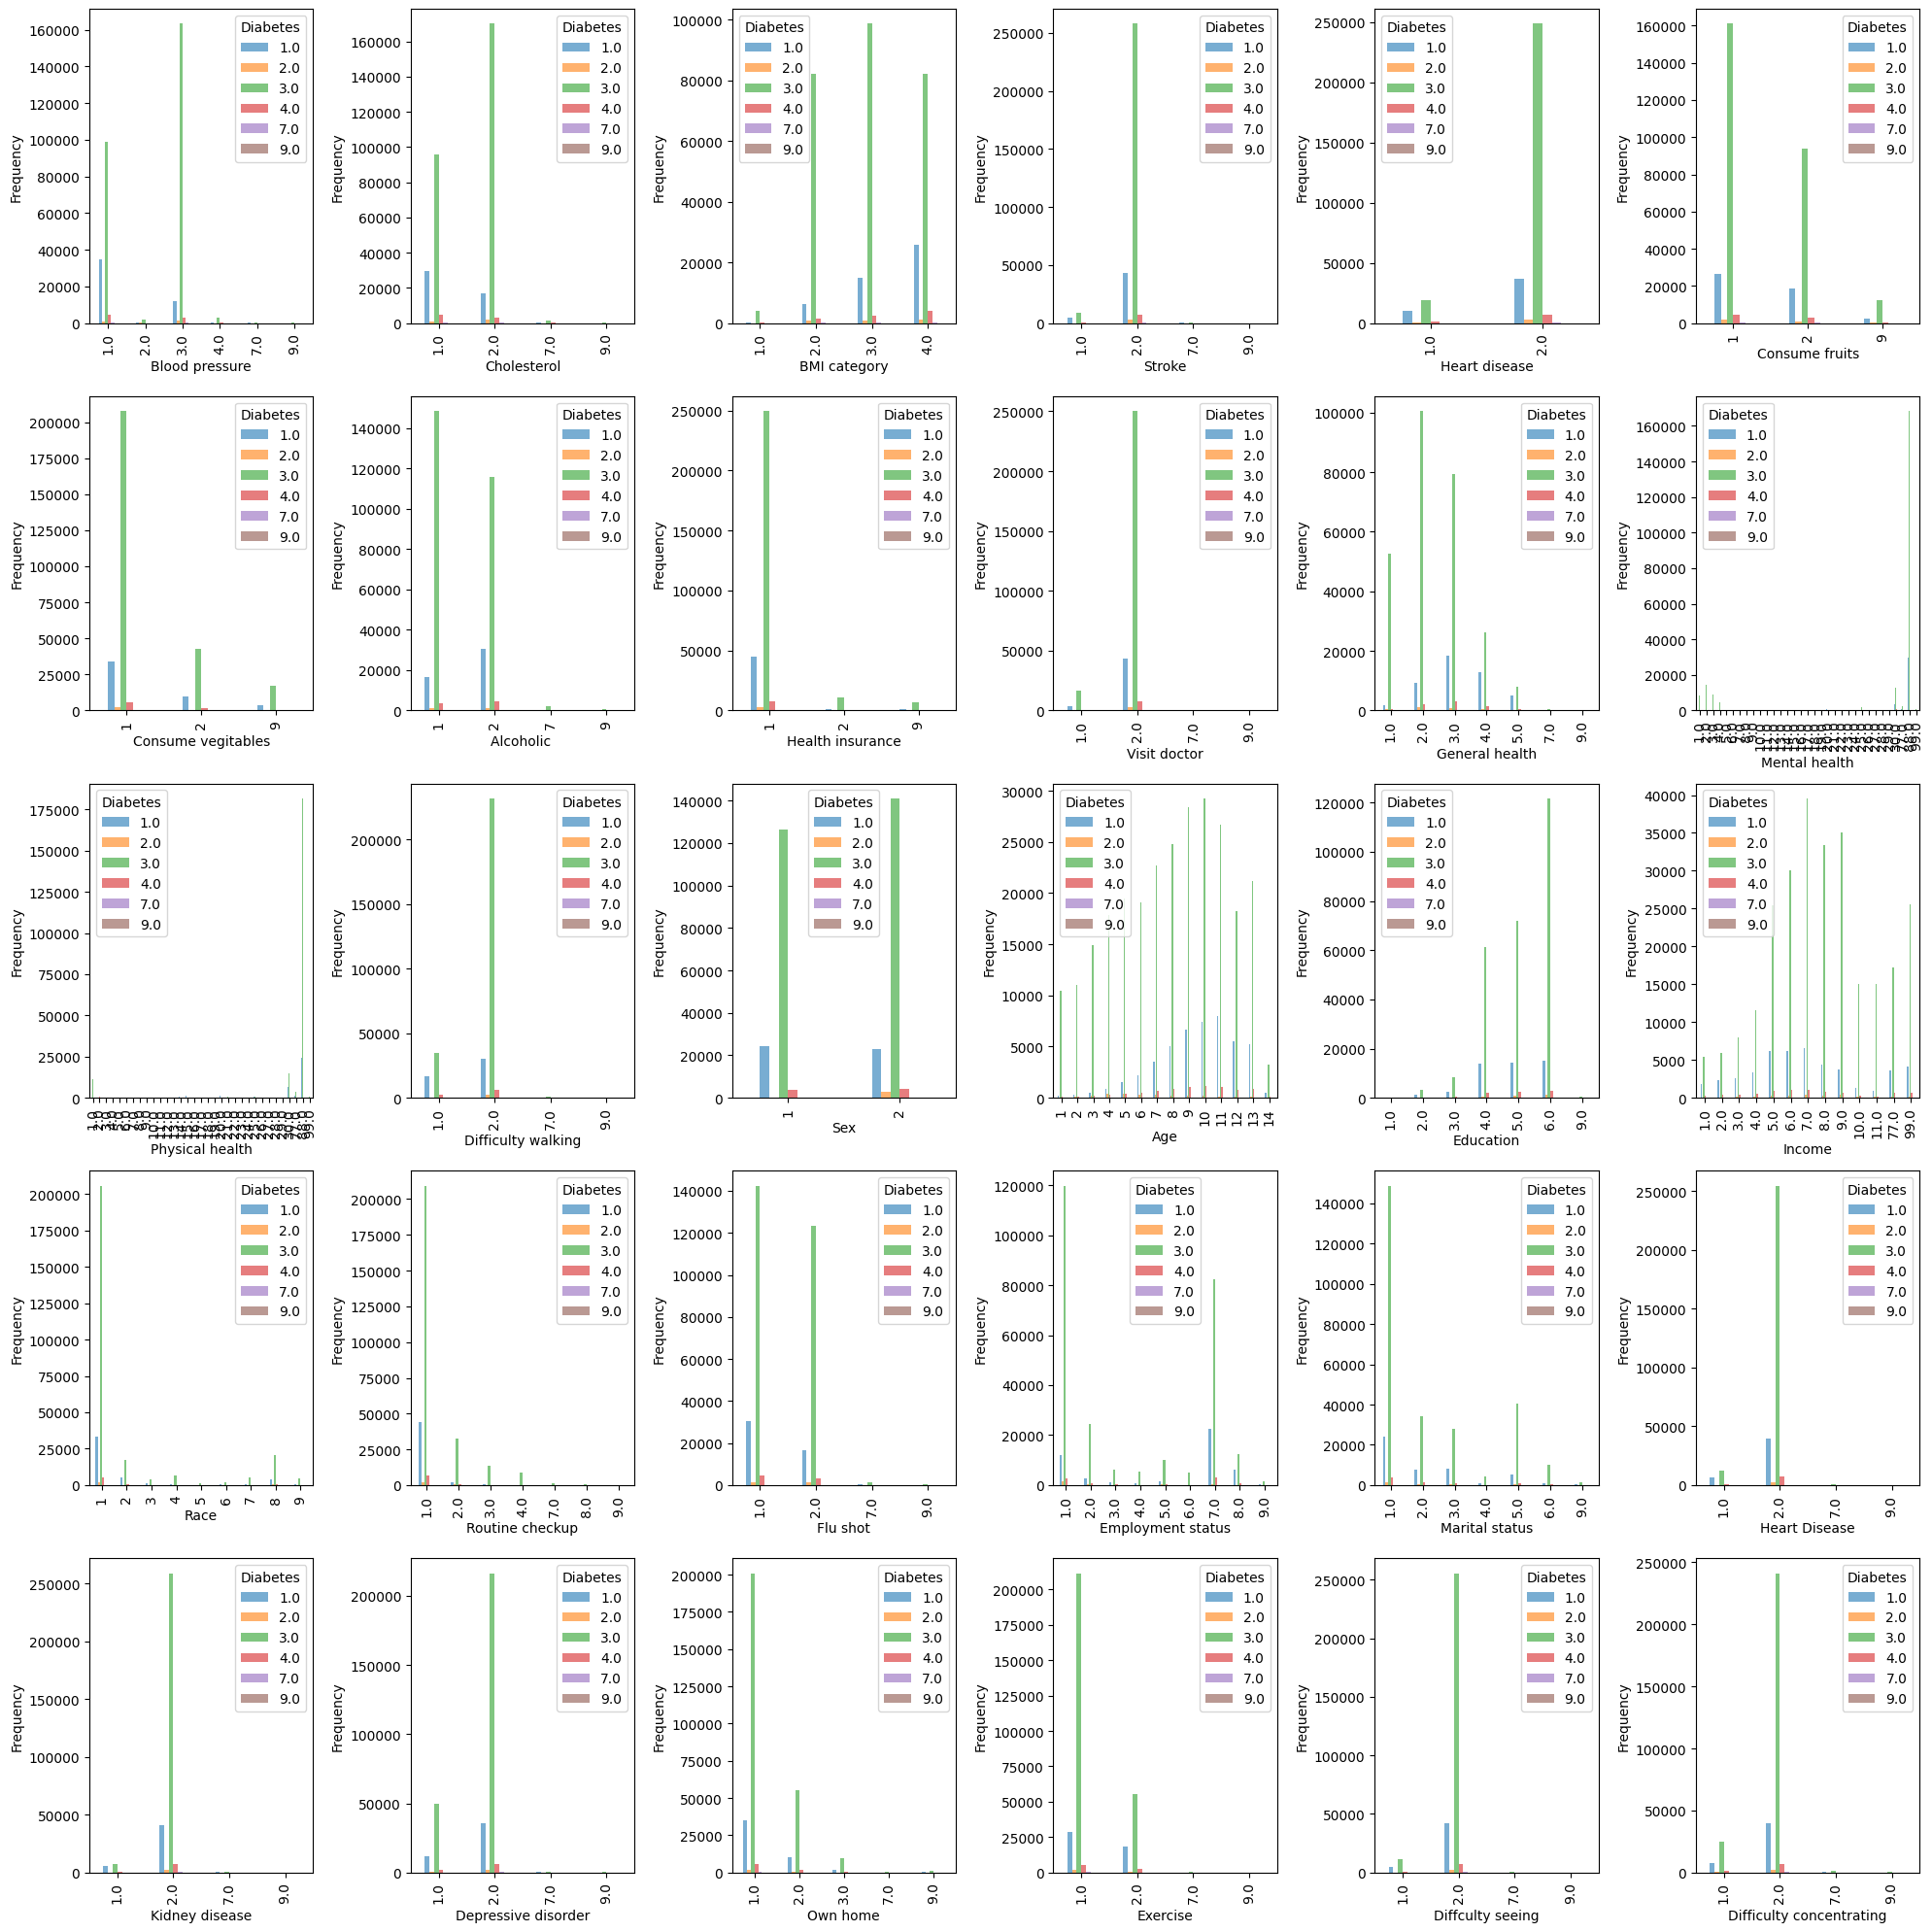

In [ ]:
plot_frequency(brfss_2021_selected)

## Mapped categories - step 2

In [2]:
import pandas as pd

In [ ]:

brfss_2021_mapped_cat = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2021.csv')
brfss_2019_mapped_cat = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2019.csv')
brfss_2017_mapped_cat = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2017.csv')
brfss_2015_mapped_cat = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/Mapped categories (Step 2)/BRFSS 2015.csv')

In [ ]:
brfss_2021_mapped_cat

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Flu shot,Employment status,Marital status,Kidney disease,Depressive disorder,Own home,Exercise,Difficulty seeing,Difficulty concentrating,Diabetes
0,0.0,1.0,1.0,0.0,0.0,1,1,0,1,0.0,...,1.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,3.0,0.0,1.0,1,0,0,1,0.0,...,0.0,7.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,4.0,0.0,0.0,1,1,1,1,0.0,...,1.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,2.0,0.0,0.0,0,0,0,1,0.0,...,1.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,4.0,0.0,0.0,1,1,1,1,0.0,...,0.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200131,0.0,1.0,4.0,0.0,0.0,0,1,1,1,0.0,...,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
200132,1.0,1.0,4.0,0.0,0.0,0,1,1,1,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
200133,1.0,1.0,2.0,0.0,0.0,0,1,0,1,0.0,...,0.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
200134,0.0,1.0,4.0,0.0,0.0,1,1,1,1,0.0,...,0.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
brfss_2021_mapped_cat['Race'] = brfss_2021_mapped_cat['Race'].replace({1: 'White', 2: 'Black', 3: 'American Indian',
                                                               4: 'Asian', 5: 'Native Hawaiian', 6: 'Other race',
                                                               7: 'Multiracial', 8: 'Hispanic'})

brfss_2021_mapped_cat['BMI category'] = brfss_2021_mapped_cat['BMI category'].replace({1: 'Underweight', 2: 'Normal weight', 3: 'Overweight', 4: 'Obese'})

brfss_2021_mapped_cat['General health'] = brfss_2021_mapped_cat['General health'].replace({1: 'Excellent', 2: 'Very good', 3: 'Good', 4: 'Fair', 5: 'Poor'})

brfss_2021_mapped_cat['Mental health'] = brfss_2021_mapped_cat['Mental health'].replace({0: '0 days',
                                                                                          1 : '1 - 5  days',
                                                                                          2: '6 - 10  days',
                                                                                          3: '11 - 15  days',
                                                                                          4: '16 - 20  days',
                                                                                          5: '21 - 25  days',
                                                                                          6: '26 - 30  days',})

brfss_2021_mapped_cat['Physical health'] = brfss_2021_mapped_cat['Physical health'].replace({0: '0 days',
                                                                                          1 : '1 - 5  days',
                                                                                          2: '6 - 10  days',
                                                                                          3: '11 - 15  days',
                                                                                          4: '16 - 20  days',
                                                                                          5: '21 - 25  days',
                                                                                          6: '26 - 30  days',})

brfss_2021_mapped_cat['Sex'] = brfss_2021_mapped_cat['Sex'].replace({1: 'Male', 2: 'Female'})

brfss_2021_mapped_cat['Age'] = brfss_2021_mapped_cat['Age'].replace({1: '18-24',
                                                                    2: '25-29',
                                                                    3: '30-34',
                                                                    4: '35-39',
                                                                    5: '40-44',
                                                                    6: '45-49',
                                                                    7: '50-54',
                                                                    8: '55-59',
                                                                    9: '60-64',
                                                                    10: '65-69',
                                                                    11: '70-74',
                                                                    12: '75-79',
                                                                    13: '80-99'})

brfss_2021_mapped_cat['Education'] = brfss_2021_mapped_cat['Education'].replace({1: 'Never', 2: 'Elementary', 3: 'Some high school', 4: 'High school grad', 5: 'Some college', 6: 'College grad'})

brfss_2021_mapped_cat['Income'] = brfss_2021_mapped_cat['Income'].replace({1: '<$10 K', 2: '$10–$15 K', 3: '$15–$20 K', 4: '$20–$25 K', 5: '$25–$35 K', 6: '$35–$50 K', 7: '$50–$75 K', 8: '>$75 K'})

brfss_2021_mapped_cat['Routine checkup'] = brfss_2021_mapped_cat['Routine checkup'].replace({1: '<1 y', 2: '1–2 y', 3:'3–5 y', 4: '>5 y'})
brfss_2021_mapped_cat = brfss_2021_mapped_cat[brfss_2021_mapped_cat['Routine checkup'] != 7]
brfss_2021_mapped_cat = brfss_2021_mapped_cat[brfss_2021_mapped_cat['Routine checkup'] != 8]
brfss_2021_mapped_cat = brfss_2021_mapped_cat[brfss_2021_mapped_cat['Routine checkup'] != 9]


brfss_2021_mapped_cat['Marital status'] = brfss_2021_mapped_cat['Marital status'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed', 4: 'Separated', 5: 'Never married', 6: 'Unmarried couple'})



In [ ]:
brfss_2021_mapped_cat.shape, brfss_2019_mapped_cat.shape, brfss_2017_mapped_cat.shape, brfss_2015_mapped_cat.shape

((200136, 30), (210874, 30), (238130, 30), (220390, 30))

Note: Heath disease column is duplicated in step 1. So, in step 1, there are 31 columns in total and in step 2 (duplicate removed) there are 30 columns)

#### Plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_frequency(df):

    # Get the number of columns in the DataFrame
  num_columns = len(df.columns) - 1  # Exclude 'Gender' column

  # Define the number of rows and columns for the subplot grid
  num_rows = 6
  num_cols = 5

  # Calculate the number of subplots needed
  num_subplots = num_rows * num_cols

  plt.rcParams['font.size'] = 12

  # Create a figure and subplot grid
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 20))

  # Flatten the axes array for easy indexing
  axes = axes.flatten()

  # Loop through columns and create grouped bar plots in subplots
  for i, column in enumerate(df.columns):
      if i < num_subplots:
          ax = axes[i]
          df.groupby([column, 'Diabetes']).size().unstack().plot(kind='bar', ax=ax, alpha = 0.6)
          #ax.set_title(f'Grouped Bar Plot of {column}')
          ax.set_xlabel(column)
          ax.set_ylabel('Frequency')
          ax.legend(title='Diabetes')
      else:
          break

  plt.tight_layout()
  plt.show()
  #plt.savefig('data distribution.png', dpi=300)

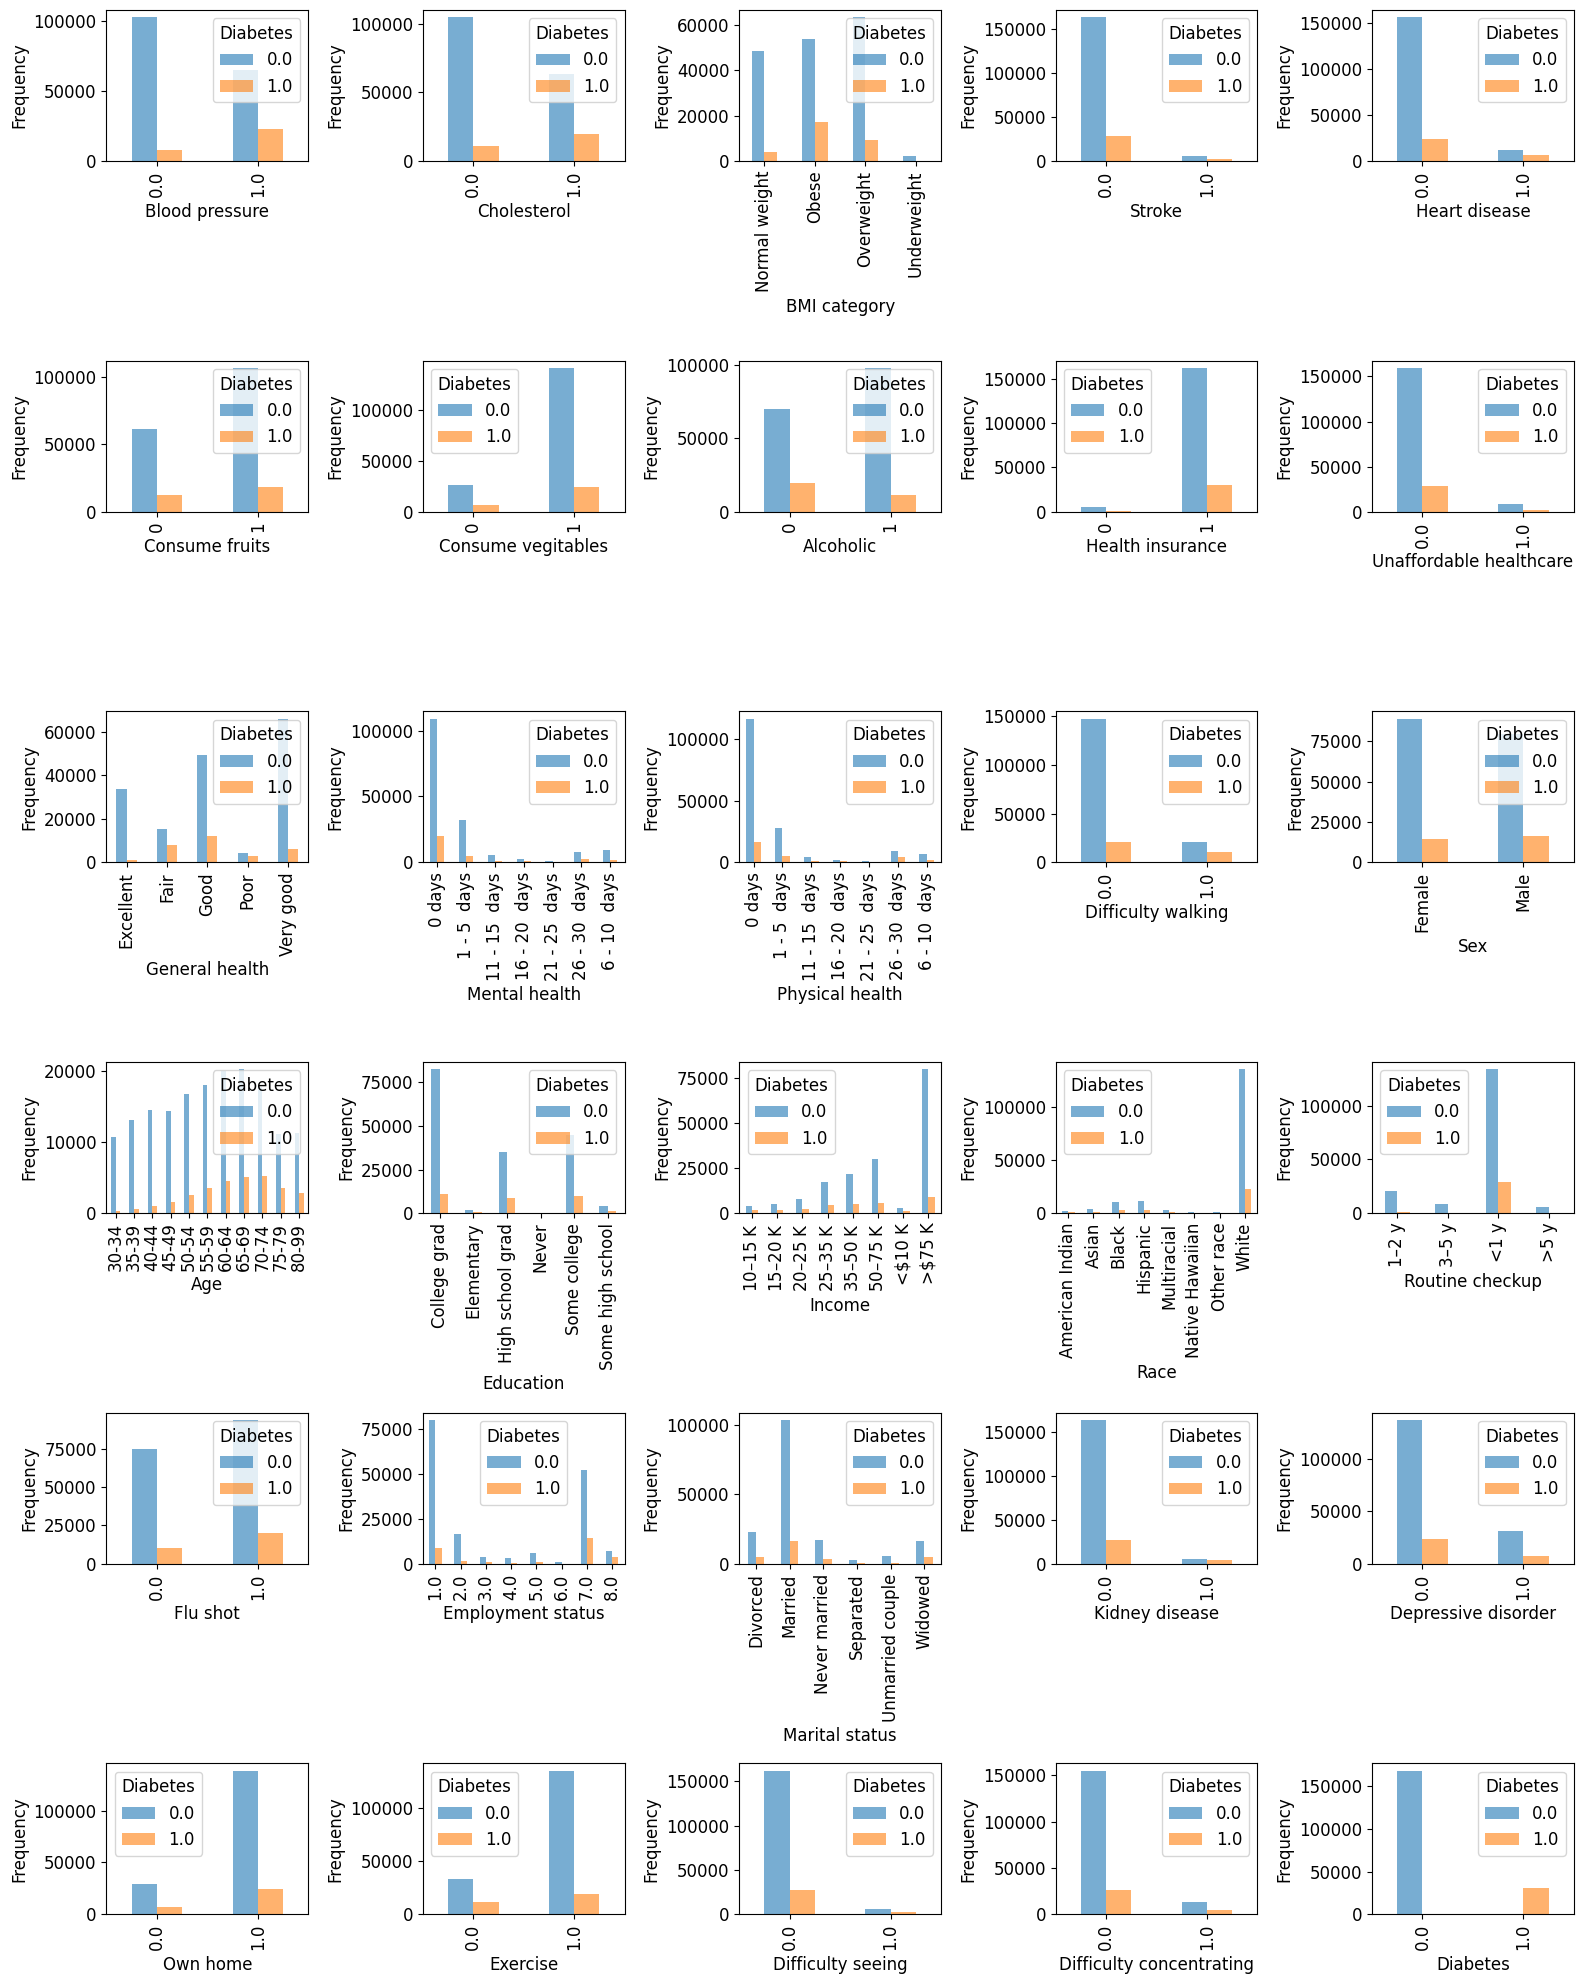

In [ ]:
plot_frequency(brfss_2021_mapped_cat)

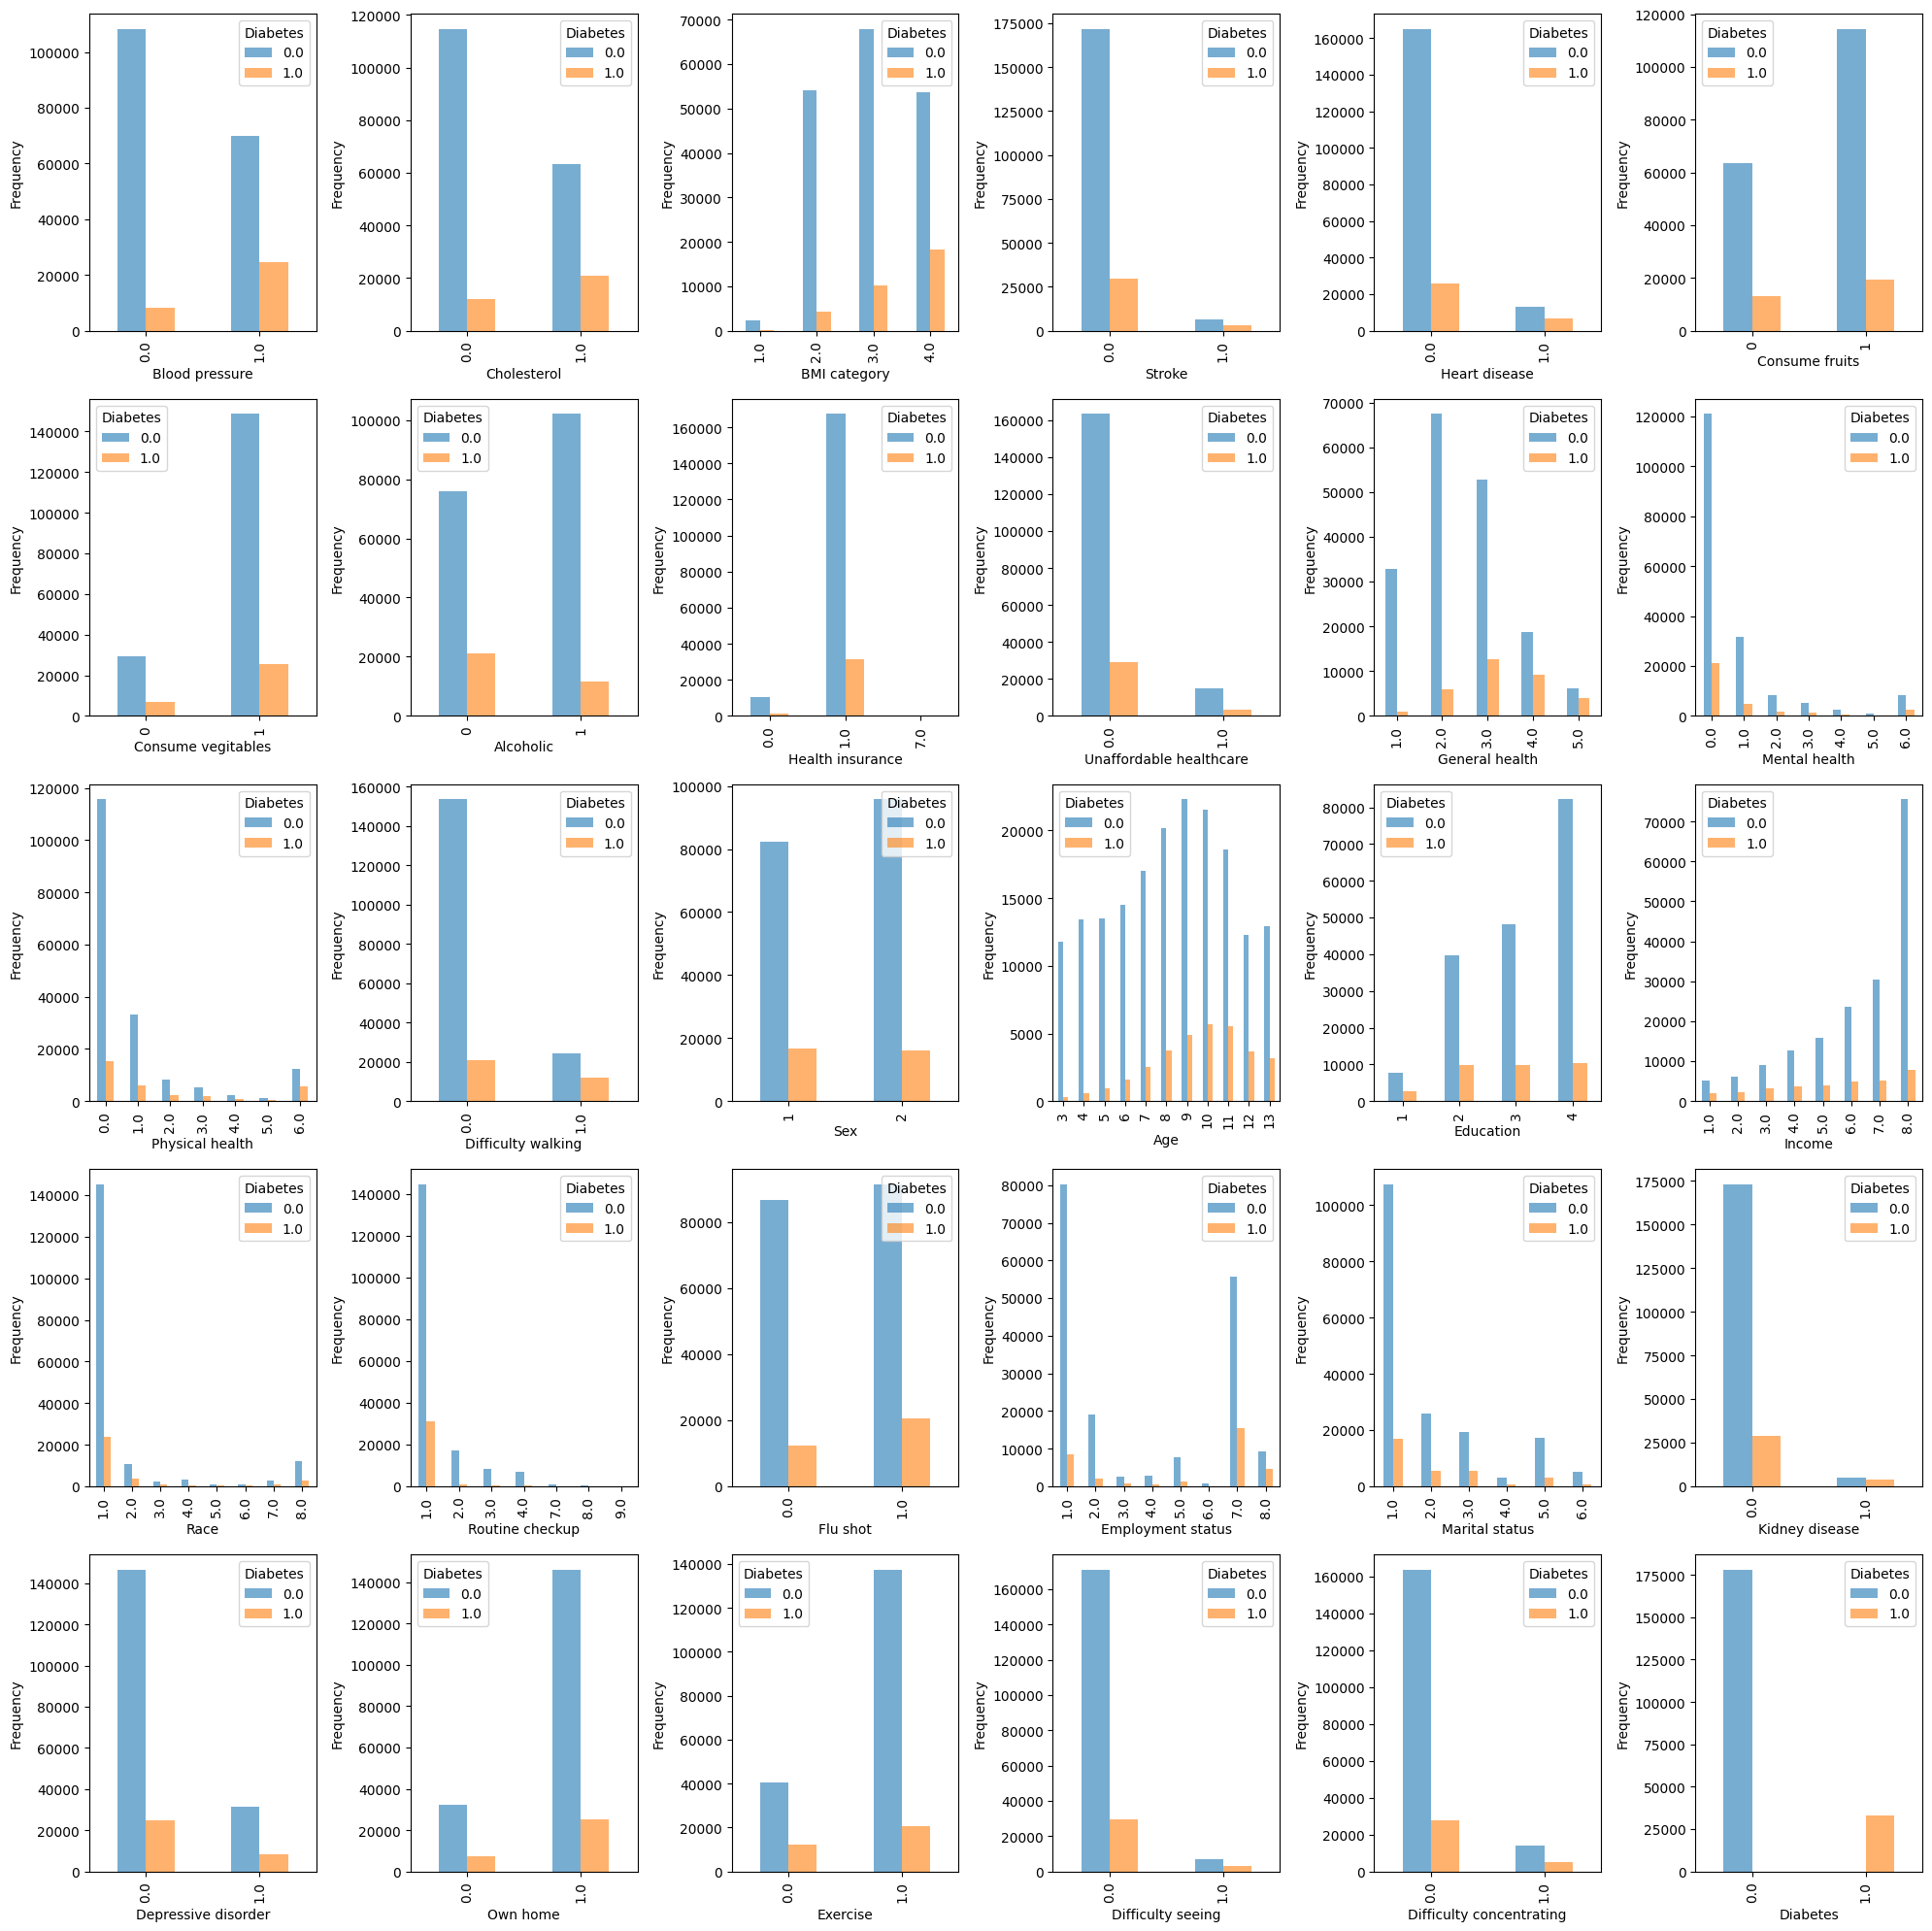

In [ ]:
plot_frequency(brfss_2019_mapped_cat)

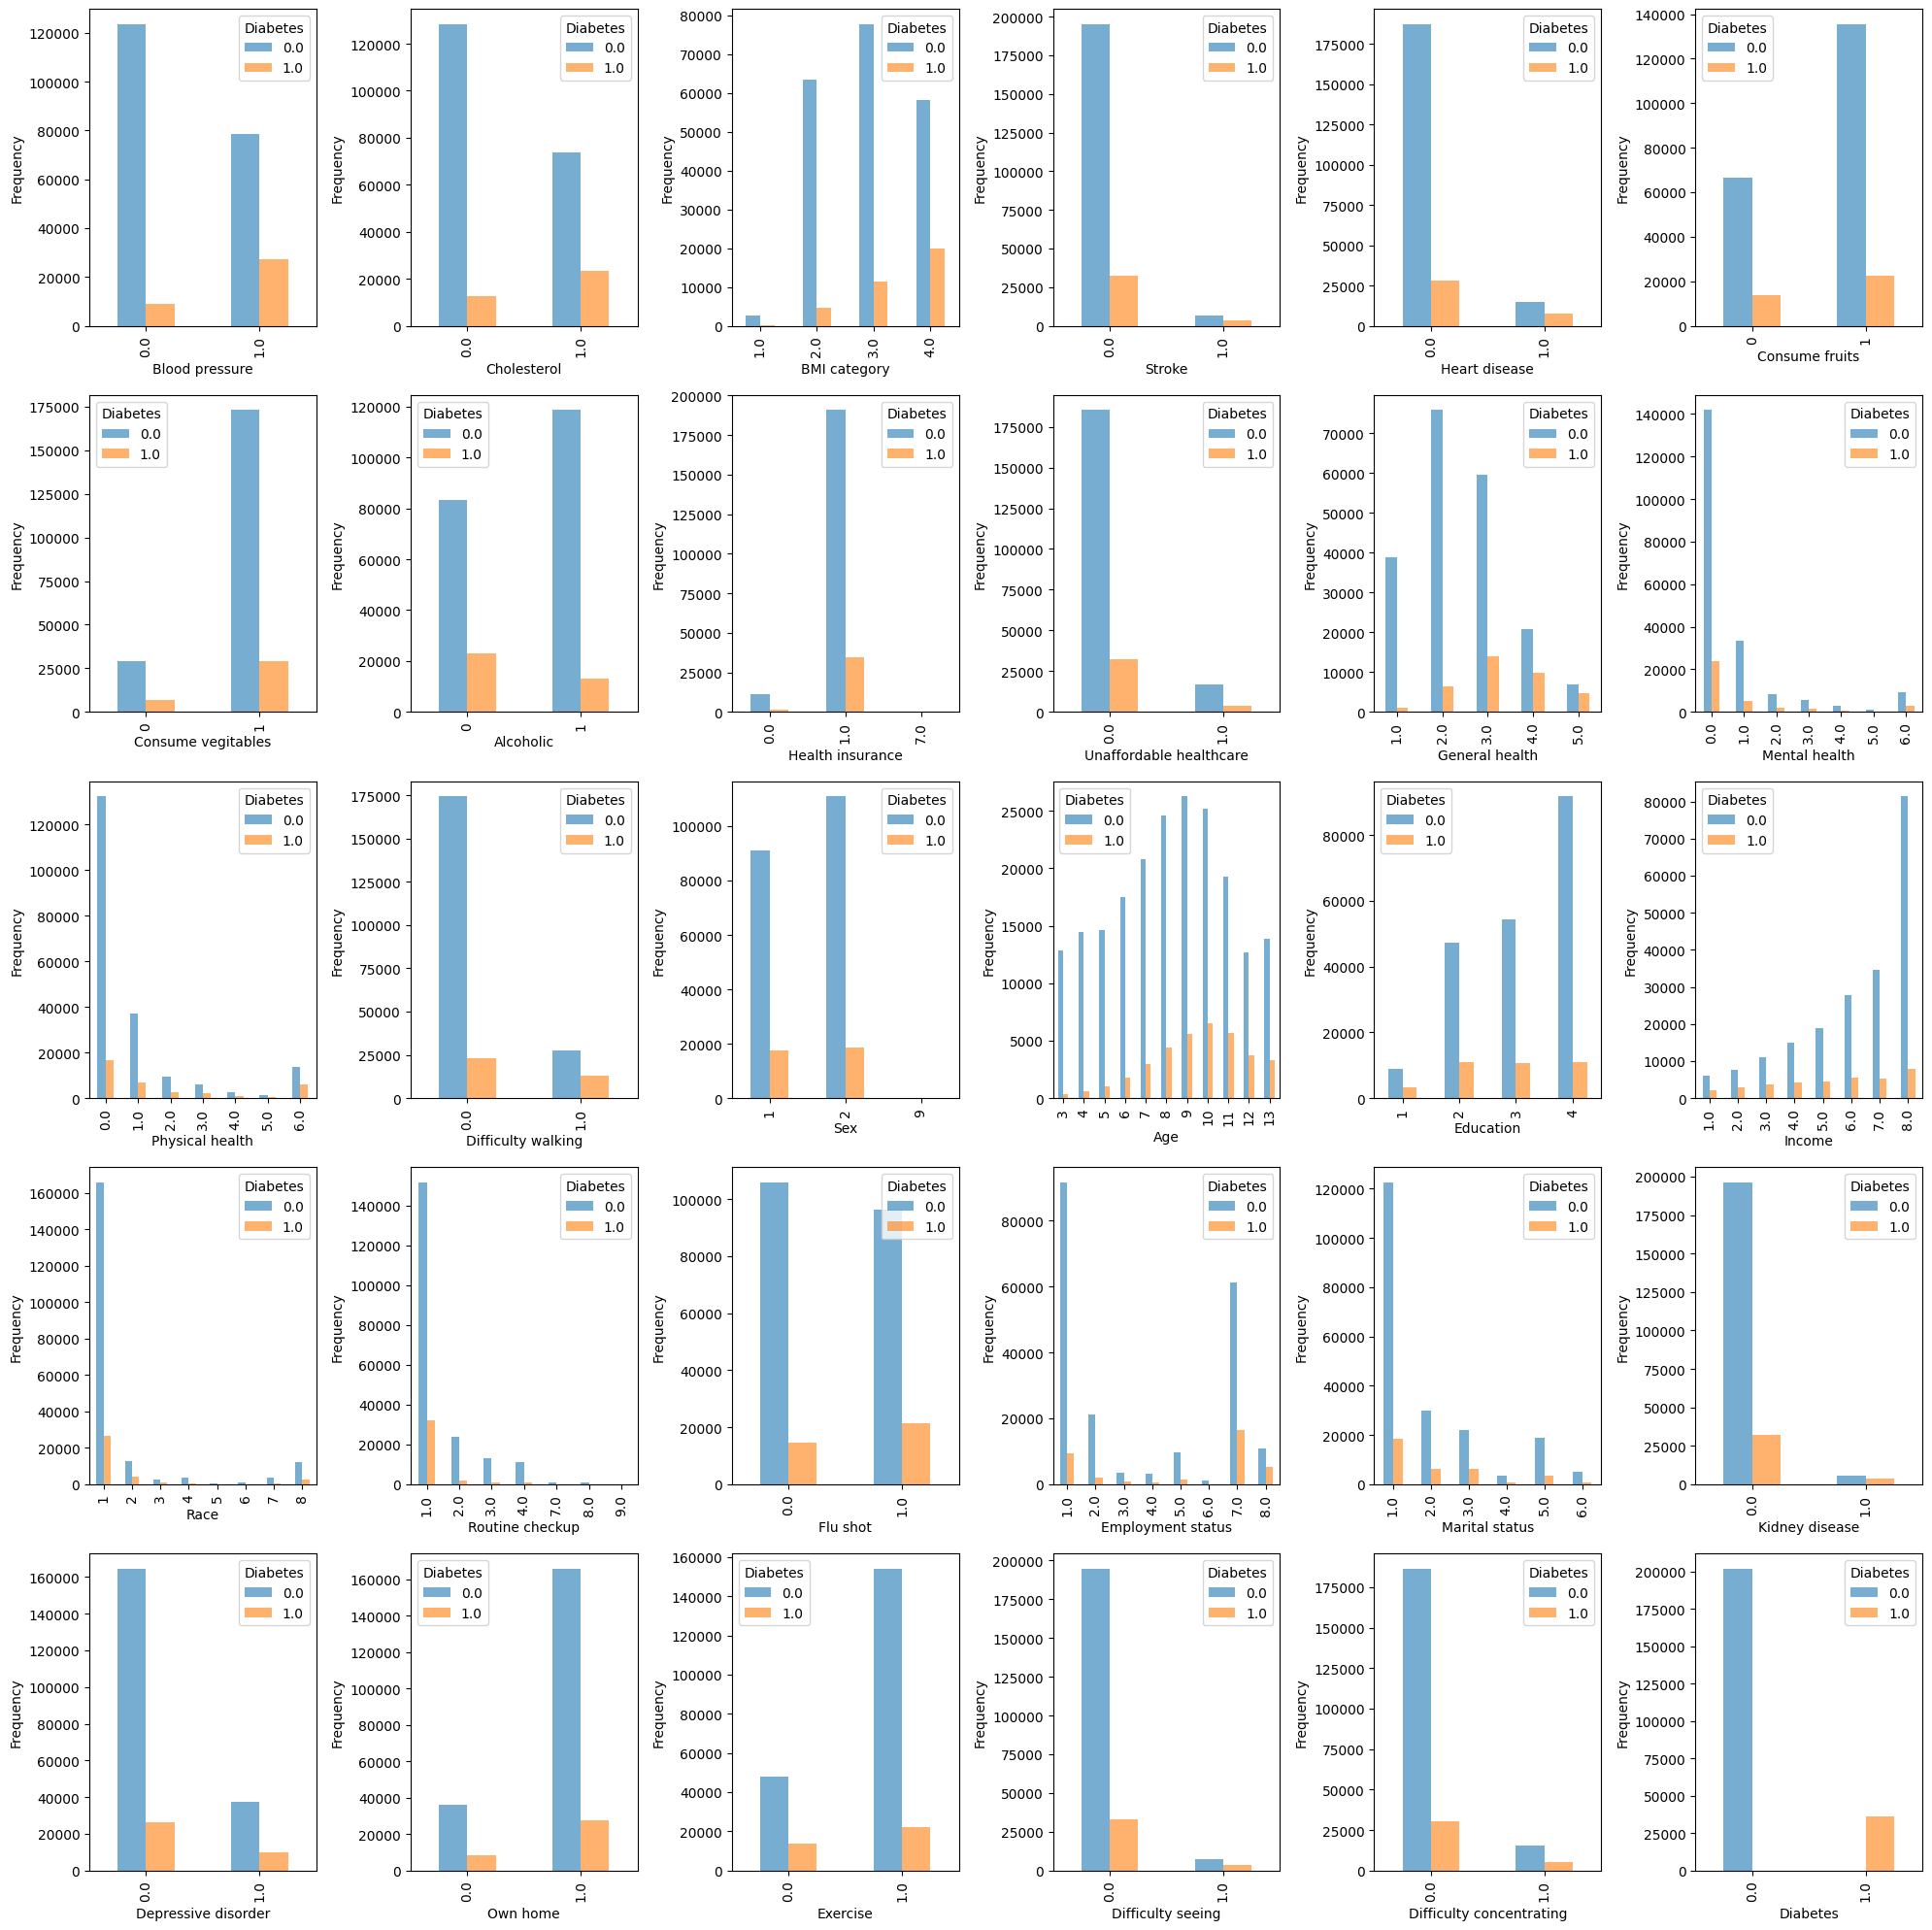

In [ ]:
plot_frequency(brfss_2017_mapped_cat)

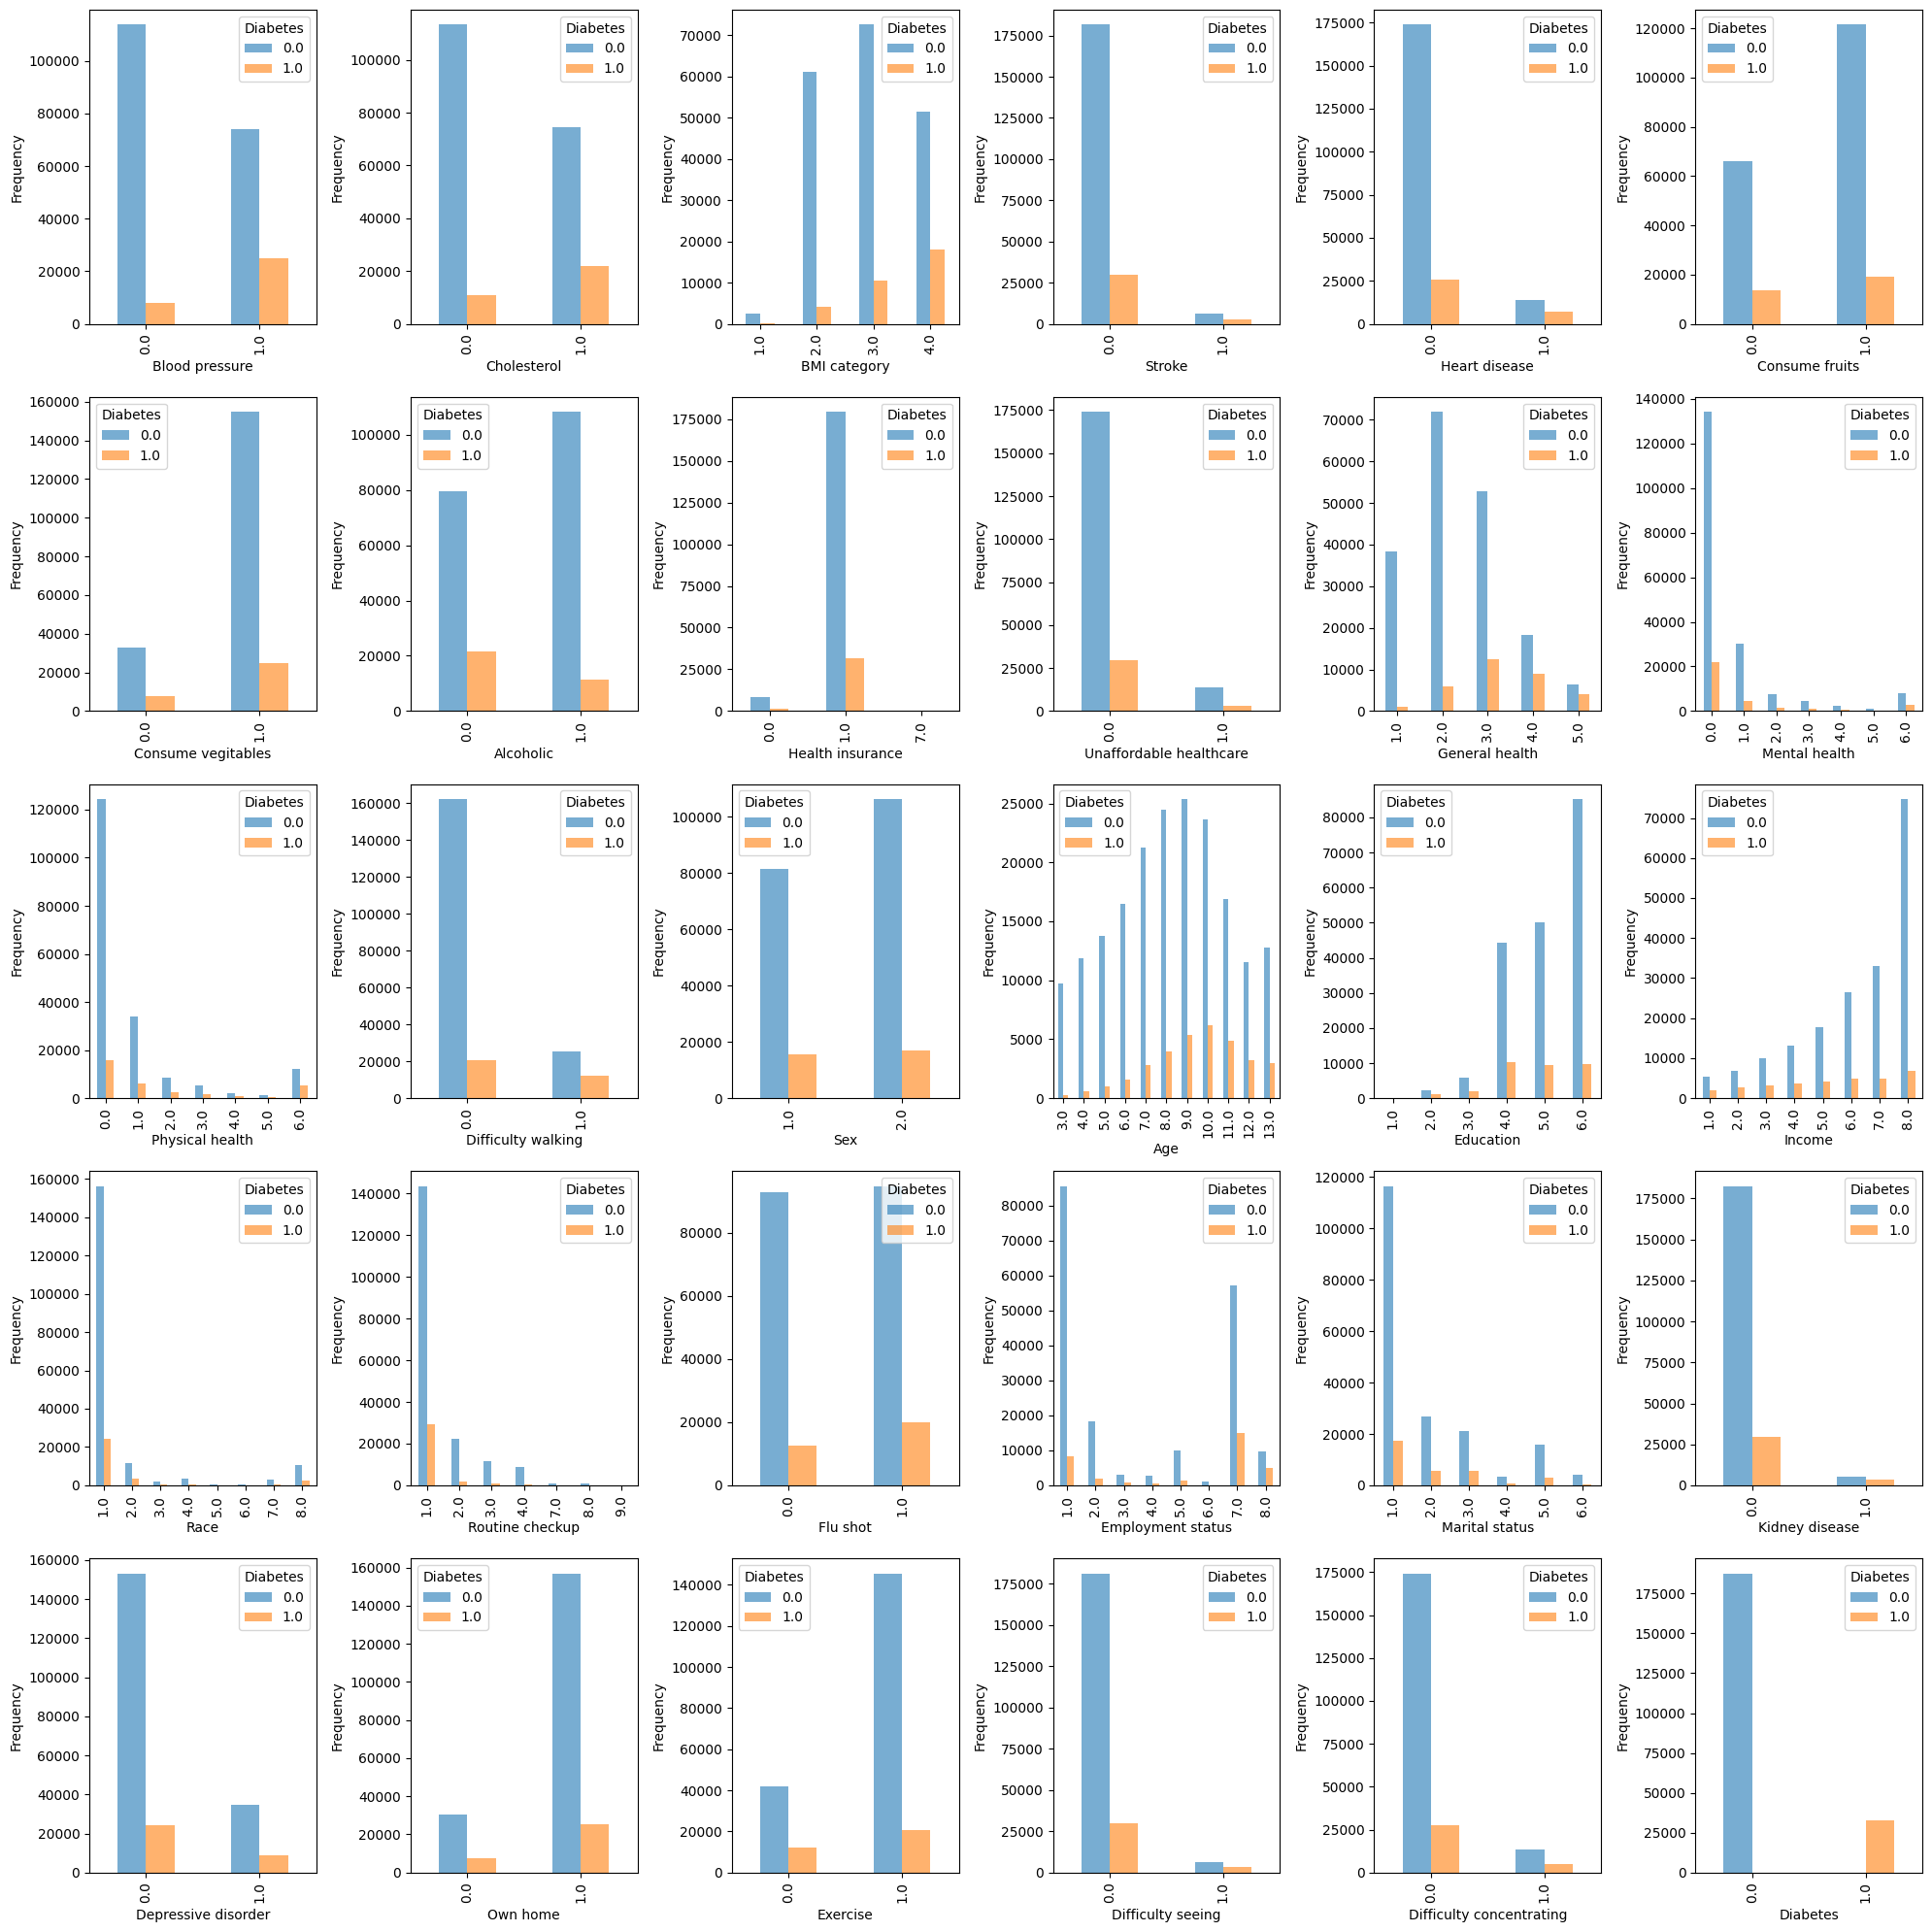

In [ ]:
plot_frequency(brfss_2015_mapped_cat)

### Data Stats

In [ ]:
max = 0
for col in brfss_2021_mapped_cat.columns:
  n_cols = len(brfss_2021_mapped_cat[col].unique())
  print(col, n_cols)
  if max < n_cols:
    max = n_cols
print(max)

Blood pressure 2
Cholesterol 2
BMI category 4
Stroke 2
Heart disease 2
Consume fruits 2
Consume vegitables 2
Alcoholic 2
Health insurance 2
Unaffordable healthcare 2
General health 5
Mental health 7
Physical health 7
Difficulty walking 2
Sex 2
Age 11
Education 6
Income 8
Race 8
Routine checkup 7
Flu shot 2
Employment status 8
Marital status 6
Kidney disease 2
Depressive disorder 2
Own home 2
Exercise 2
Difficulty seeing 2
Difficulty concentrating 2
Diabetes 2
11


In [ ]:
for i in brfss_2021_mapped_cat.groupby(['Age']).size().keys():
  print(i)

3
4
5
6
7
8
9
10
11
12
13


In [ ]:
for i in dict(brfss_2021_mapped_cat.groupby(['Age']).size()).values():
  print(i)

11188
13878
15724
16077
19357
21757
24672
25526
23121
14740
14096


In [ ]:
for i in brfss_2021_mapped_cat.groupby(['Race']).size().keys():
  print(i)

1
2
3
4
5
6
7
8


In [ ]:
for i in dict(brfss_2021_mapped_cat.groupby(['Race']).size()).values():
  print(i)

159313
13808
2985
4199
772
1453
3751
13855


In [ ]:
for i in brfss_2021_mapped_cat.groupby(['Sex']).size().keys():
  print(i)

1
2


In [ ]:
for i in dict(brfss_2021_mapped_cat.groupby(['Sex']).size()).values():
  print(i)

95988
104148


## One hot encoded - step 3

In [ ]:
brfss_2021_one_hot = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2021.csv')
brfss_2019_one_hot = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2019.csv')
brfss_2017_one_hot = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2017.csv')
brfss_2015_one_hot = pd.read_csv('/content/drive/Shareddrives/Trustworthiness/Gender Disparity in Diabetes/BRFSS Datasets - Cleaned/One hot encoded (Step 3)/BRFSS 2015.csv')

In [ ]:
brfss_2021_one_hot

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Employment status_Retired,Employment status_Self-employed,Employment status_Student,Employment status_Unable to work,Marital status_Divorced,Marital status_Married,Marital status_Never married,Marital status_Separated,Marital status_Unmarried couple,Marital status_Widowed
0,0.0,1.0,1.0,0.0,0.0,1,1,0,1,0.0,...,1,0,0,0,0,1,0,0,0,0
1,1.0,0.0,3.0,0.0,1.0,1,0,0,1,0.0,...,1,0,0,0,0,0,0,0,0,1
2,1.0,1.0,4.0,0.0,0.0,1,1,1,1,0.0,...,1,0,0,0,0,1,0,0,0,0
3,0.0,0.0,2.0,0.0,0.0,0,0,0,1,0.0,...,1,0,0,0,0,1,0,0,0,0
4,1.0,0.0,4.0,0.0,0.0,1,1,1,1,0.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200131,0.0,1.0,4.0,0.0,0.0,0,1,1,1,0.0,...,0,0,0,0,1,0,0,0,0,0
200132,1.0,1.0,4.0,0.0,0.0,0,1,1,1,0.0,...,0,0,0,0,0,1,0,0,0,0
200133,1.0,1.0,2.0,0.0,0.0,0,1,0,1,0.0,...,0,0,0,0,0,0,1,0,0,0
200134,0.0,1.0,4.0,0.0,0.0,1,1,1,1,0.0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
brfss_2019_one_hot

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Employment status_Retired,Employment status_Self-employed,Employment status_Student,Employment status_Unable to work,Marital status_Divorced,Marital status_Married,Marital status_Never married,Marital status_Separated,Marital status_Unmarried couple,Marital status_Widowed
0,1.0,1.0,3.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,2.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
2,1.0,0.0,4.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0.0,4.0,0.0,0.0,1,1,1,1.0,0.0,...,1,0,0,0,1,0,0,0,0,0
4,0.0,1.0,1.0,0.0,0.0,0,0,0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210869,1.0,1.0,4.0,0.0,0.0,0,0,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
210870,0.0,0.0,2.0,0.0,0.0,0,0,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
210871,1.0,0.0,3.0,0.0,0.0,1,0,0,1.0,0.0,...,0,0,0,1,1,0,0,0,0,0
210872,0.0,0.0,3.0,0.0,0.0,1,1,1,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
brfss_2017_one_hot

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Employment status_Retired,Employment status_Self-employed,Employment status_Student,Employment status_Unable to work,Marital status_Divorced,Marital status_Married,Marital status_Never married,Marital status_Separated,Marital status_Unmarried couple,Marital status_Widowed
0,1.0,1.0,3.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,1.0,0.0,3.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
2,0.0,0.0,2.0,0.0,0.0,1,0,0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,1.0,0.0,3.0,0.0,1.0,0,1,1,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,0.0,0.0,3.0,0.0,0.0,1,1,0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238125,1.0,0.0,4.0,0.0,1.0,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
238126,1.0,1.0,4.0,0.0,0.0,1,1,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
238127,1.0,0.0,3.0,0.0,0.0,1,1,1,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
238128,1.0,1.0,2.0,0.0,0.0,0,1,0,1.0,1.0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
brfss_2015_one_hot

,Blood pressure,Cholesterol,BMI category,Stroke,Heart disease,Consume fruits,Consume vegitables,Alcoholic,Health insurance,Unaffordable healthcare,...,Employment status_Retired,Employment status_Self-employed,Employment status_Student,Employment status_Unable to work,Marital status_Divorced,Marital status_Married,Marital status_Never married,Marital status_Separated,Marital status_Unmarried couple,Marital status_Widowed
0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0
1,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220385,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
220386,1.0,1.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
220387,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
220388,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
max = 0
for col in brfss_df_selected_2021.columns:
  n_cols = len(brfss_df_selected_2021[col].unique())
  print(col, n_cols)
  if max < n_cols:
    max = n_cols
print(max)

Blood pressure 2
Cholesterol 2
BMI category 4
Stroke 2
Heart disease 2
Consume fruits 2
Consume vegitables 2
Alcoholic 2
Health insurance 2
Unaffordable healthcare 2
General health 5
Mental health 7
Physical health 7
Difficulty walking 2
Sex 2
Age 11
Education 6
Income 8
Routine checkup 7
Flu shot 2
Kidney disease 2
Depressive disorder 2
Own home 2
Exercise 2
Difficulty seeing 2
Difficulty concentrating 2
Diabetes 2
Race_American Indian 2
Race_Asian 2
Race_Black 2
Race_Hispanic 2
Race_Multiracial 2
Race_Native Hawaiian 2
Race_Other race 2
Race_White 2
Employment status_Employed 2
Employment status_Homemaker 2
Employment status_No work < 1 y 2
Employment status_No work > 1 y 2
Employment status_Retired 2
Employment status_Self-employed 2
Employment status_Student 2
Employment status_Unable to work 2
Marital status_Divorced 2
Marital status_Married 2
Marital status_Never married 2
Marital status_Separated 2
Marital status_Unmarried couple 2
Marital status_Widowed 2
11


In [ ]:
dict(brfss_df_selected_2021.groupby(['Age']).size()).values()

dict_values([11188, 13878, 15724, 16077, 19357, 21757, 24672, 25526, 23121, 14740, 14096])

In [ ]:
dict(brfss_df_selected_2021.groupby(['Age']).size())

{3: 11188,
 4: 13878,
 5: 15724,
 6: 16077,
 7: 19357,
 8: 21757,
 9: 24672,
 10: 25526,
 11: 23121,
 12: 14740,
 13: 14096}

In [ ]:
frequency = {
}

